In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import json
import pickle

In [18]:
%matplotlib inline

In [3]:
from netpyne import specs, sim

# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

--No graphics will be displayed.


In [4]:
## cfg

cfg = specs.SimConfig()

# ------------------------------------------------------------------------------
#
# SIMULATION CONFIGURATION
#
# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------
# Run parameters
# ------------------------------------------------------------------------------
cfg.duration = 4000  # Duration of the sim, in ms
cfg.dt = 0.025   # 0.025  # Internal Integration Time Step
cfg.verbose = 0  # Show detailed messages
cfg.progressBar = 0  # even more detailed message
cfg.hParams['celsius'] = 37
cfg.createNEURONObj = 1
cfg.createPyStruct = 1
cfg.printRunTime = 0.1

cfg.connRandomSecFromList = False  # set to false for reproducibility
cfg.cvode_active = False
cfg.cvode_atol = 1e-6
cfg.cache_efficient = True
# cfg.printRunTime = 0.1  			## specified above
cfg.oneSynPerNetcon = False
cfg.includeParamsLabel = False
# cfg.printPopAvgRates = [1000, 2000]  # "printPopAvgRates": [[1500,1750],[1750,2000],[2000,2250],[2250,2500]]
cfg.validateNetParams = False

# ------------------------------------------------------------------------------
# Recording
# ------------------------------------------------------------------------------
cfg.allpops = ['NGF1', 'IT2', 'SOM2', 'PV2', 'VIP2', 'NGF2', 'IT3', 'SOM3', 'PV3', 'VIP3', 'NGF3', 'ITP4', 'ITS4',
               'SOM4', 'PV4', 'VIP4', 'NGF4', 'IT5A', 'CT5A', 'SOM5A', 'PV5A', 'VIP5A', 'NGF5A', 'IT5B', 'CT5B', 'PT5B',
               'SOM5B', 'PV5B', 'VIP5B', 'NGF5B', 'IT6', 'CT6', 'SOM6', 'PV6', 'VIP6', 'NGF6', 'TC', 'TCM', 'HTC', 'IRE', 'IREM', 'TI', 'TIM'] #               'TC', 'TCM', 'HTC', 'IRE', 'IREM', 'TI', 'TIM'

cfg.allCorticalPops = ['NGF1', 'IT2', 'SOM2', 'PV2', 'VIP2', 'NGF2', 'IT3', 'SOM3', 'PV3', 'VIP3', 'NGF3', 'ITP4',
                       'ITS4', 'SOM4', 'PV4', 'VIP4', 'NGF4', 'IT5A', 'CT5A', 'SOM5A', 'PV5A', 'VIP5A', 'NGF5A', 'IT5B',
                       'PT5B', 'CT5B', 'SOM5B', 'PV5B', 'VIP5B', 'NGF5B', 'IT6', 'CT6', 'SOM6', 'PV6', 'VIP6', 'NGF6']

cfg.allThalPops = ['TC', 'TCM', 'HTC', 'IRE', 'IREM', 'TI', 'TIM']

cfg.Epops = ['IT2', 'IT3', 'ITP4', 'ITS4', 'IT5A', 'CT5A', 'IT5B', 'CT5B', 'PT5B', 'IT6', 'CT6']  # all layers

cfg.Ipops = ['NGF1',                            # L1
             'PV2', 'SOM2', 'VIP2', 'NGF2',      # L2
             'PV3', 'SOM3', 'VIP3', 'NGF3',      # L3
             'PV4', 'SOM4', 'VIP4', 'NGF4',      # L4
             'PV5A', 'SOM5A', 'VIP5A', 'NGF5A',  # L5A
             'PV5B', 'SOM5B', 'VIP5B', 'NGF5B',  # L5B
             'PV6', 'SOM6', 'VIP6', 'NGF6']      # L6

cfg.TEpops = ['TC', 'TCM', 'HTC']

cfg.TIpops = ['IRE', 'IREM', 'TI', 'TIM']

cfg.pops_active = False # ['IT2', 'ITP4', 'ITS4', 'PV4', 'VIP4', 'NGF4', 'IRE', 'IREM', 'TI', 'TIM']

if cfg.pops_active:
    cfg.allpops = cfg.pops_active

# Dict with traces to record -- taken from M1 cfg.py
cfg.recordTraces = {'V_soma': {'sec': 'soma', 'loc': 0.5, 'var': 'v'},
                    # 'g_NMDA': {'sec': 'soma', 'loc': 0.5, 'synMech': 'NMDA', 'var': 'g'},
                    # 'i_GABAB': {'sec': 'soma', 'loc': 0.5, 'synMech': 'GABAB', 'var': 'i'}
                    }

cfg.recordStim = False  # Seen in M1 cfg.py
cfg.recordTime = True  # SEen in M1 cfg.py
cfg.recordStep = 0.05  # St ep size (in ms) to save data -- value from M1 cfg.py


# ------------------------------------------------------------------------------
# Savingx
# ------------------------------------------------------------------------------

cfg.simLabel = 'GABABTrace_test'
cfg.saveFolder = 'simOutput/' + cfg.simLabel  # Set file output name
cfg.savePickle = True  # Save pkl file
cfg.saveJson = False  # Save json file
cfg.saveDataInclude = ['simData', 'simConfig', 'net', 'netParams',  'netCells', 'netPops']
cfg.backupCfgFile = None
cfg.gatherOnlySimData = False
cfg.saveCellSecs = False
cfg.saveCellConns = False

# ------------------------------------------------------------------------------
# Analysis and plotting
# ------------------------------------------------------------------------------
#
# cfg.analysis['plotRaster'] = {'include': cfg.allCorticalPops, 'saveFig': True, 'showFig': False, 'orderInverse': True, 'figSize': (25, 25),
#                               'markerSize': 1, 'oneFigPer': 'trace'}   # Plot a raster

cfg.analysis['plotTraces'] = {'include': cfg.allpops, 'timeRange': [0, cfg.duration], 'oneFigPer': 'cell', 'overlay': True, 'saveFig': False, 'showFig': True, 'figSize':(16,4)}

# ------------------------------------------------------------------------------
# Network
# ------------------------------------------------------------------------------

# Insert params from previous tuning
# with open('data/initCfg.json', 'rb') as f:
#     cfgLoad = json.load(f)

# for key, value in cfgLoad.items():
#     setattr(cfg, key, value)

# These values taken from M1 cfg (https://github.com/Neurosim-lab/netpyne/bflob/development/examples/M1detailed/cfg.py)

cfg.singleCellPops = True


cfg.scale = 1.0  # Is this what should be used?
cfg.sizeY = 2000.0  # 1350.0 in M1_detailed # should this be set to 2000 since that is the full height of the column?
cfg.sizeX = 200.0  # 400 - This may change depending on electrode radius
cfg.sizeZ = 200.0
cfg.scaleDensity = 1.0  # Should be 1.0 unless need lower cell density for test simulation or visualization


# ------------------------------------------------------------------------------
# Connectivity
# ------------------------------------------------------------------------------

# Cortical
cfg.addConn = 1.0
cfg.addSubConn = 1.0
cfg.wireCortex = 1.0

# cfg.EEGain = 0.75
# cfg.EIGain = 1.5
# cfg.IEGain = 1.5
# cfg.IIGain = 1.0

cfg.EEGain = 1.31667
cfg.EIGain = 1.6313576020869256
cfg.IEGain = 0.6
cfg.IIGain = 1.4102431748127964

## E/I->E/I layer weights (L1-3, L4, L5, L6)
cfg.EELayerGain = {'1': 1.0, '2': 1.0, '3': 1.0, '4': 1.0, '5A': 1.0, '5B': 1.0, '6': 1.0}
cfg.EILayerGain = {'1': 1.0, '2': 1.0, '3': 1.0, '4': 1.0, '5A': 1.0, '5B': 1.0, '6': 1.0}
cfg.IELayerGain = {'1': 1.0, '2': 1.0, '3': 1.0, '4': 1.0, '5A': 1.0, '5B': 1.0, '6': 1.0}
cfg.IILayerGain = {'1': 1.0, '2': 1.0, '3': 1.0, '4': 1.0, '5A': 1.0, '5B': 1.0, '6': 1.0}

# E -> E based on postsynaptic cortical E neuron population
cfg.EEPopGain = {"IT2": 1.3125, "IT3": 1.55, "ITP4": 1.0, "ITS4": 1.0, "IT5A": 1.05,
                 "CT5A": 1.1500000000000001, "IT5B": 0.425, "CT5B": 1.1500000000000001,
                 "PT5B": 1.05, "IT6": 1.05, "CT6": 1.05}  # this is from after generation 203 of optunaERP_23dec23_

# gains from E -> I based on postsynaptic cortical I neuron population
cfg.EIPopGain = {"NGF1": 1.0, "SOM2": 1.0, "PV2": 1.0, "VIP2": 1.0, "NGF2": 1.0, "SOM3": 1.0, "PV3": 1.0, "VIP3": 1.0,
                 "NGF3": 1.0, "SOM4": 1.0, "PV4": 1.0, "VIP4": 1.0, "NGF4": 1.0, "SOM5A": 1.0, "PV5A": 1.4,
                 "VIP5A": 1.25, "NGF5A": 0.8, "SOM5B": 1.0, "PV5B": 1.45, "VIP5B": 1.4, "NGF5B": 0.9500000000000001,
                 "SOM6": 1.0, "PV6": 1.4, "VIP6": 1.3499999999999999, "NGF6": 0.65}

## E->I by target cell type
cfg.EICellTypeGain = {'PV': 1.0, 'SOM': 1.0, 'VIP': 1.0,
                      'NGF': 1.0}

# I->E by target cell type
cfg.IECellTypeGain = {'PV': 1.0, 'SOM': 1.0, 'VIP': 1.0, 'NGF': 1.0}

# Thalamic
cfg.addIntraThalamicConn = 1.0
cfg.addCorticoThalamicConn = 1.0
cfg.addThalamoCorticalConn = 1.0

cfg.thalamoCorticalGain = 1.0
cfg.intraThalamicGain = 1.0
cfg.corticoThalamicGain = 1.0
cfg.CTGainThalI = 1.0

cfg.intraThalamicEEGain = 1.0
cfg.intraThalamicEIGain = 0.3
cfg.intraThalamicIEGain = 0.1
cfg.intraThalamicIIGain = 1.0

# these params control cochlea -> Thalamus
cfg.cochThalweightECore = 0.225  # 1.0  # 0.1125
cfg.cochThalprobECore = 0.3
cfg.cochThalweightICore = 0.0675
cfg.cochThalprobICore = 0.15  # 0.5
cfg.cochThalMatrixCoreFactor = 0.1
cfg.cochthalweightEMatrix = 0.1125
cfg.cochthalweightIMatrix = 0.0675
cfg.cochThalprobEMatrix = 0.0375
cfg.cochThalprobIMatrix = 0.009375
cfg.cochThalFreqRange = [750, 1250]

# Control the strength of thalamic inputs to different subpopulations
cfg.thalL4PV = 0.21367245896786016
cfg.thalL4SOM = 0.24260966747847523
cfg.thalL4E = 2.0  # 1.9540886147587417

cfg.thalL4VIP = 1.0
cfg.thalL4NGF = 1.0
cfg.L3L3scaleFactor = 1.0
cfg.CT6ScaleFactor = 1.0

cfg.ITS4Type = 'ITS4'

cfg.thalL1NGF = 1.0
cfg.ENGF1 = 1.0

# L4 -> L3 Inhib pops
cfg.L4L3E = 1.0
cfg.L4L3PV = 1.0
cfg.L4L3SOM = 1.0
cfg.L4L3VIP = 1.0
cfg.L4L3NGF = 1.0
cfg.L4L4E = 1.0

# L3 -> L4 Inhib pops
cfg.L3L4PV = 1.0
cfg.L3L4SOM = 1.0

# full weight conn matrix
with open('conn/conn.pkl', 'rb') as fileObj:
    connData = pickle.load(fileObj)
cfg.wmat = connData['wmat']

cfg.seeds = {'conn': 23451, 'stim': 1, 'loc': 1}


In [5]:
from netpyne import specs

import pickle, json

netParams = specs.NetParams()   # object of class NetParams to store the network parameters

#------------------------------------------------------------------------------
# General connectivity parameters
#------------------------------------------------------------------------------

netParams.version = 45

# ------------------------------------------------------------------------------
#
# NETWORK PARAMETERS
#
# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------
# General network parameters
# ------------------------------------------------------------------------------

netParams.scale = cfg.scale  # Scale factor for number of cells # NOT DEFINED YET! 3/11/19 # How is this different than scaleDensity?
netParams.sizeX = cfg.sizeX  # x-dimension (horizontal length) size in um
netParams.sizeY = cfg.sizeY  # y-dimension (vertical height or cortical depth) size in um
netParams.sizeZ = cfg.sizeZ  # z-dimension (horizontal depth) size in um
netParams.shape = 'cylinder'  # cylindrical (column-like) volume

# ------------------------------------------------------------------------------
# General connectivity parameters
# -----------------------------------------------------------------------------
netParams.scaleConnWeight = 1.0  # Connection weight scale factor (default if no model specified)
netParams.scaleConnWeightModels = {'HH_reduced': 1.0, 'HH_full': 1.0}  # scale conn weight factor for each cell model
netParams.scaleConnWeightNetStims = 1.0  # 0.5  # scale conn weight factor for NetStims
netParams.defaultThreshold = 0.0  # spike threshold, 10 mV is NetCon default, lower it for all cells
netParams.defaultDelay = 2.0  # default conn delay (ms)
netParams.propVelocity = 500.0  # propagation velocity (um/ms)
netParams.probLambda = 100.0  # length constant (lambda) for connection probability decay (um)
ThalamicCoreLambda = 50.0
# ------------------------------------------------------------------------------
# Cell parameters
# ------------------------------------------------------------------------------

Etypes = ['IT', 'ITS4', 'PT', 'CT']
Itypes = ['PV', 'SOM', 'VIP', 'NGF']
cellModels = ['HH_reduced', 'HH_full']  # List of cell models

# II: 100-950, IV: 950-1250, V: 1250-1550, VI: 1550-2000
layer = {'1': [0.00, 0.05], '2': [0.05, 0.08], '3': [0.08, 0.475], '4': [0.475, 0.625],
         '5A': [0.625, 0.667], '5B': [0.667, 0.775], '6': [0.775, 1], 'thal': [1.2, 1.4],
         'cochlear': [1.6, 1.601]}  # normalized layer boundaries

layerGroups = {
    '1-3': [layer['1'][0], layer['3'][1]],  # L1-3
    '4': layer['4'],  # L4
    '5': [layer['5A'][0], layer['5B'][1]],  # L5A-5B
    '6': layer['6']}  # L6

# ------------------------------------------------------------------------------
## Load cell rules previously saved using netpyne format (DOES NOT INCLUDE VIP, NGF and spiny stellate)
## include conditions ('conds') for each cellRule
cellParamLabels = ['IT2_reduced', 'IT3_reduced', 'ITP4_reduced', 'ITS4_reduced',
                   'IT5A_reduced', 'CT5A_reduced', 'IT5B_reduced', 'PT5B_reduced',
                   'CT5B_reduced', 'IT6_reduced', 'CT6_reduced', 'PV_reduced',
                   'SOM_reduced', 'VIP_reduced', 'NGF_reduced',
                   'RE_reduced', 'TC_reduced', 'HTC_reduced', 'TI_reduced',
                   ]

for ruleLabel in cellParamLabels:
    netParams.loadCellParamsRule(label=ruleLabel, fileName='cells/' + ruleLabel + '_cellParams.json')  # Load cellParams for each of the above cell subtype

# ------------------------------------------------------------------------------
# Population parameters
# ------------------------------------------------------------------------------

## load densities
with open('cells/cellDensity.pkl', 'rb') as fileObj:
    density = pickle.load(fileObj)['density']
density = {k: [x * cfg.scaleDensity for x in v] for k, v in density.items()}  # Scale densities

## LAYER 1:
netParams.popParams['NGF1'] = {'cellType': 'NGF', 'cellModel': 'HH_reduced', 'ynormRange': layer['1'], 'density': density[('A1', 'nonVIP')][0]}

## LAYER 2:
netParams.popParams['IT2'] = {'cellType': 'IT', 'cellModel': 'HH_reduced', 'ynormRange': layer['2'], 'density': density[('A1', 'E')][1]}  # cfg.cellmod for 'cellModel' in M1 netParams.py
netParams.popParams['SOM2'] = {'cellType': 'SOM', 'cellModel': 'HH_reduced', 'ynormRange': layer['2'], 'density': density[('A1', 'SOM')][1]}
netParams.popParams['PV2'] = {'cellType': 'PV', 'cellModel': 'HH_reduced', 'ynormRange': layer['2'], 'density': density[('A1', 'PV')][1]}
netParams.popParams['VIP2'] = {'cellType': 'VIP', 'cellModel': 'HH_reduced', 'ynormRange': layer['2'], 'density': density[('A1', 'VIP')][1]}
netParams.popParams['NGF2'] = {'cellType': 'NGF', 'cellModel': 'HH_reduced', 'ynormRange': layer['2'], 'density': density[('A1', 'nonVIP')][1]}

## LAYER 3:
netParams.popParams['IT3'] = {'cellType': 'IT', 'cellModel': 'HH_reduced', 'ynormRange': layer['3'], 'density': density[('A1', 'E')][1]}  # CHANGE DENSITY
netParams.popParams['SOM3'] = {'cellType': 'SOM', 'cellModel': 'HH_reduced', 'ynormRange': layer['3'], 'density': density[('A1', 'SOM')][1]}  # CHANGE DENSITY
netParams.popParams['PV3'] = {'cellType': 'PV', 'cellModel': 'HH_reduced', 'ynormRange': layer['3'], 'density': density[('A1', 'PV')][1]}  # CHANGE DENSITY
netParams.popParams['VIP3'] = {'cellType': 'VIP', 'cellModel': 'HH_reduced', 'ynormRange': layer['3'], 'density': density[('A1', 'VIP')][1]}  # CHANGE DENSITY
netParams.popParams['NGF3'] = {'cellType': 'NGF', 'cellModel': 'HH_reduced', 'ynormRange': layer['3'], 'density': density[('A1', 'nonVIP')][1]}

## LAYER 4:
netParams.popParams['ITP4'] = {'cellType': 'IT', 'cellModel': 'HH_reduced', 'ynormRange': layer['4'], 'density': 0.5 * density[('A1', 'E')][2]}  # CHANGE DENSITY
netParams.popParams['ITS4'] = {'cellType': cfg.ITS4Type, 'cellModel': 'HH_reduced', 'ynormRange': layer['4'], 'density': 0.5 * density[('A1', 'E')][2]}  # CHANGE DENSITY
netParams.popParams['SOM4'] = {'cellType': 'SOM', 'cellModel': 'HH_reduced', 'ynormRange': layer['4'], 'density': density[('A1', 'SOM')][2]}
netParams.popParams['PV4'] = {'cellType': 'PV', 'cellModel': 'HH_reduced', 'ynormRange': layer['4'], 'density': density[('A1', 'PV')][2]}
netParams.popParams['VIP4'] = {'cellType': 'VIP', 'cellModel': 'HH_reduced', 'ynormRange': layer['4'], 'density': density[('A1', 'VIP')][2]}
netParams.popParams['NGF4'] = {'cellType': 'NGF', 'cellModel': 'HH_reduced', 'ynormRange': layer['4'], 'density': density[('A1', 'nonVIP')][2]}

## LAYER 5A:
netParams.popParams['IT5A'] = {'cellType': 'IT', 'cellModel': 'HH_reduced', 'ynormRange': layer['5A'], 'density': 0.5 * density[('A1', 'E')][3]}
netParams.popParams['CT5A'] = {'cellType': 'CT', 'cellModel': 'HH_reduced', 'ynormRange': layer['5A'], 'density': 0.5 * density[('A1', 'E')][3]}
netParams.popParams['SOM5A'] = {'cellType': 'SOM', 'cellModel': 'HH_reduced', 'ynormRange': layer['5A'], 'density': density[('A1', 'SOM')][3]}
netParams.popParams['PV5A'] = {'cellType': 'PV', 'cellModel': 'HH_reduced', 'ynormRange': layer['5A'], 'density': density[('A1', 'PV')][3]}
netParams.popParams['VIP5A'] = {'cellType': 'VIP', 'cellModel': 'HH_reduced', 'ynormRange': layer['5A'], 'density': density[('A1', 'VIP')][3]}
netParams.popParams['NGF5A'] = {'cellType': 'NGF', 'cellModel': 'HH_reduced', 'ynormRange': layer['5A'], 'density': density[('A1', 'nonVIP')][3]}

## LAYER 5B:
netParams.popParams['IT5B'] = {'cellType': 'IT', 'cellModel': 'HH_reduced', 'ynormRange': layer['5B'], 'density': (1 / 3) * density[('A1', 'E')][4]}
netParams.popParams['CT5B'] = {'cellType': 'CT', 'cellModel': 'HH_reduced', 'ynormRange': layer['5B'], 'density': (1 / 3) * density[('A1', 'E')][4]}
netParams.popParams['PT5B'] = {'cellType': 'PT', 'cellModel': 'HH_reduced', 'ynormRange': layer['5B'], 'density': (1 / 3) * density[('A1', 'E')][4]}
netParams.popParams['SOM5B'] = {'cellType': 'SOM', 'cellModel': 'HH_reduced', 'ynormRange': layer['5B'], 'density': density[('A1', 'SOM')][4]}
netParams.popParams['PV5B'] = {'cellType': 'PV', 'cellModel': 'HH_reduced', 'ynormRange': layer['5B'], 'density': density[('A1', 'PV')][4]}
netParams.popParams['VIP5B'] = {'cellType': 'VIP', 'cellModel': 'HH_reduced', 'ynormRange': layer['5B'], 'density': density[('A1', 'VIP')][4]}
netParams.popParams['NGF5B'] = {'cellType': 'NGF', 'cellModel': 'HH_reduced', 'ynormRange': layer['5B'], 'density': density[('A1', 'nonVIP')][4]}

### LAYER 6:
netParams.popParams['IT6'] = {'cellType': 'IT', 'cellModel': 'HH_reduced', 'ynormRange': layer['6'], 'density': 0.5 * density[('A1', 'E')][5]}
netParams.popParams['CT6'] = {'cellType': 'CT', 'cellModel': 'HH_reduced', 'ynormRange': layer['6'], 'density': 0.5 * density[('A1', 'E')][5]}
netParams.popParams['SOM6'] = {'cellType': 'SOM', 'cellModel': 'HH_reduced', 'ynormRange': layer['6'], 'density': density[('A1', 'SOM')][5]}
netParams.popParams['PV6'] = {'cellType': 'PV', 'cellModel': 'HH_reduced', 'ynormRange': layer['6'], 'density': density[('A1', 'PV')][5]}
netParams.popParams['VIP6'] = {'cellType': 'VIP', 'cellModel': 'HH_reduced', 'ynormRange': layer['6'], 'density': density[('A1', 'VIP')][5]}
netParams.popParams['NGF6'] = {'cellType': 'NGF', 'cellModel': 'HH_reduced', 'ynormRange': layer['6'], 'density': density[('A1', 'nonVIP')][5]}

### THALAMIC POPULATIONS (from prev model)
thalDensity = density[('A1', 'PV')][2] * 1.25  # temporary estimate (from prev model)

netParams.popParams['TC'] = {'cellType': 'TC', 'cellModel': 'HH_reduced', 'ynormRange': layer['thal'], 'density': 0.75 * thalDensity}
netParams.popParams['TCM'] = {'cellType': 'TC', 'cellModel': 'HH_reduced', 'ynormRange': layer['thal'], 'density': thalDensity}
netParams.popParams['HTC'] = {'cellType': 'HTC', 'cellModel': 'HH_reduced', 'ynormRange': layer['thal'], 'density': 0.25 * thalDensity}
netParams.popParams['IRE'] = {'cellType': 'RE', 'cellModel': 'HH_reduced', 'ynormRange': layer['thal'], 'density': thalDensity}
netParams.popParams['IREM'] = {'cellType': 'RE', 'cellModel': 'HH_reduced', 'ynormRange': layer['thal'], 'density': thalDensity}
netParams.popParams['TI'] = {'cellType': 'TI', 'cellModel': 'HH_reduced', 'ynormRange': layer['thal'], 'density': 0.33 * thalDensity}  # Winer & Larue 1996; Huang et al 1999
netParams.popParams['TIM'] = {'cellType': 'TI', 'cellModel': 'HH_reduced', 'ynormRange': layer['thal'], 'density': 0.33 * thalDensity}  # Winer & Larue 1996; Huang et al 1999

if cfg.singleCellPops:
    for pop in netParams.popParams.values():
        pop['numCells'] = 1

## List of E and I pops to use later on
Epops = ['IT2', 'IT3', 'ITP4', 'ITS4', 'IT5A', 'CT5A', 'IT5B', 'CT5B', 'PT5B', 'IT6', 'CT6']  # all layers

Ipops = ['NGF1',  # L1
         'PV2', 'SOM2', 'VIP2', 'NGF2',  # L2
         'PV3', 'SOM3', 'VIP3', 'NGF3',  # L3
         'PV4', 'SOM4', 'VIP4', 'NGF4',  # L4
         'PV5A', 'SOM5A', 'VIP5A', 'NGF5A',  # L5A
         'PV5B', 'SOM5B', 'VIP5B', 'NGF5B',  # L5B
         'PV6', 'SOM6', 'VIP6', 'NGF6']  # L6

# ------------------------------------------------------------------------------
# Synaptic mechanism parameters
# ------------------------------------------------------------------------------

### From M1 detailed netParams.py
netParams.synMechParams['NMDA'] = {'mod': 'MyExp2SynNMDABB', 'tau1NMDA': 15, 'tau2NMDA': 150, 'e': 0}
netParams.synMechParams['AMPA'] = {'mod': 'MyExp2SynBB', 'tau1': 0.05, 'tau2': 5.3, 'e': 0}
netParams.synMechParams['GABAB'] = {"mod": "MyExp2SynBB", "tau1": 41, "tau2": 642, "e": -105}
netParams.synMechParams['GABAA'] = {'mod': 'MyExp2SynBB', 'tau1': 0.07, 'tau2': 18.2, 'e': -80}
netParams.synMechParams['GABAA_VIP'] = {'mod': 'MyExp2SynBB', 'tau1': 0.3, 'tau2': 6.4, 'e': -80}  # Pi et al 2013
netParams.synMechParams['GABAASlow'] = {'mod': 'MyExp2SynBB', 'tau1': 2, 'tau2': 100, 'e': -80}
netParams.synMechParams['GABAASlowSlow'] = {'mod': 'MyExp2SynBB', 'tau1': 200, 'tau2': 400, 'e': -80}

ESynMech = ['AMPA', 'NMDA']
SOMESynMech = ['GABAASlow', 'GABAB']
SOMISynMech = ['GABAASlow']
PVSynMech = ['GABAA']
VIPSynMech = ['GABAA_VIP']
NGFESynMech = ['GABAA', 'GABAB']
NGFISynMech = ['GABAA']
ThalIESynMech = ['GABAASlow', 'GABAB']
ThalIISynMech = ['GABAASlow']


In [12]:
#------------------------------------------------------------------------------
# IClamp inputs F I curve
#------------------------------------------------------------------------------
with open('data/input_res_vals.json', 'rb') as f:
    rin_vals = json.load(f)

with open('data/rmp_pops_no_input.json', 'rb') as f:
    rmp_vals = json.load(f)

target_mv = -75

for popName1 in cfg.Epops + cfg.Ipops:
    rin = rin_vals[popName1]
    v_init = rmp_vals[popName1]
    holding_current = (target_mv - v_init) / rin

    netParams.stimSourceParams['Input_'+popName1] = {'type': 'IClamp', 'del': 0, 'dur': cfg.duration, 'amp': holding_current}
    netParams.stimTargetParams['Input->'+popName1] = {'source': 'Input_'+popName1, 'sec':'soma_0', 'loc': 0.5, 'conds': {'pop':popName1}}





In [14]:
#------------------------------------------------------------------------------
# NetStim inputs to simulate Spontaneous synapses + background in A1 neurons - data from "   "
#------------------------------------------------------------------------------
SourcesNumber = 15 # for each post Mtype - sec distribution

synperNeuronStimI = {}
synperNeuronStimE = {}
GsynStimI = {}
GsynStimE = {}

for post in cfg.Ipops + cfg.Epops:
    synperNeuronStimI[post] = 100
    GsynStimI[post] = 1.0
    synperNeuronStimE[post] = 2000

    if post in ['SOM3', 'SOM4', 'SOM5A', 'SOM5B', 'SOM6']:
        GsynStimE[post] = 0.25
    elif post in ['ITS4', 'IT5A', 'CT5B', 'IT6']:
        GsynStimE[post] = 0.3
    elif post in ['IT3', 'ITP4', 'VIP4', 'CT5A', 'VIP5A', 'IT5B', 'PT5B', 'VIP5B', 'CT6']:
        GsynStimE[post] = 0.5
    else:
        GsynStimE[post] = 1.0


cfg.addStimSynS1 = True
cfg.rateStimI = 5.0  # Hz
cfg.rateStimE = 1.0  # Hz

if cfg.addStimSynS1:
    for post in cfg.Ipops + cfg.Epops:

        synperNeuron = synperNeuronStimI[post]
        ratespontaneous = cfg.rateStimI
        for qSnum in range(SourcesNumber):
            ratesdifferentiation = (0.8 + 0.4*qSnum/(SourcesNumber-1)) * (synperNeuron*ratespontaneous)/SourcesNumber
            netParams.stimSourceParams['StimSynS1_S_all_INH->' + post + '_' + str(qSnum)] = {'type': 'NetStim', 'rate': ratesdifferentiation, 'noise': 1}

        synperNeuron = synperNeuronStimE[post]
        ratespontaneous = cfg.rateStimE
        for qSnum in range(SourcesNumber):
            ratesdifferentiation = (0.8 + 0.4*qSnum/(SourcesNumber-1)) * (synperNeuron*ratespontaneous)/SourcesNumber
            netParams.stimSourceParams['StimSynS1_S_all_EXC->' + post + '_' + str(qSnum)] = {'type': 'NetStim', 'rate': ratesdifferentiation, 'noise': 1}

    #------------------------------------------------------------------------------
    for post in cfg.Epops:
        for qSnum in range(SourcesNumber):
            netParams.stimTargetParams['StimSynS1_T_all_EXC->' + post + '_' + str(qSnum)] = {
                'source': 'StimSynS1_S_all_EXC->' + post + '_' + str(qSnum),
                'conds':  {'pop': [post]},
                'synMech': 'AMPA',
                'sec': 'all',  # soma not inclued in S1 model
                'weight': GsynStimE[post],
                'delay': 0.1}

    for post in cfg.Ipops:
        for qSnum in range(SourcesNumber):
            netParams.stimTargetParams['StimSynS1_T_all_EXC->' + post + '_' + str(qSnum)] = {
                'source': 'StimSynS1_S_all_EXC->' + post + '_' + str(qSnum),
                'synMech': 'AMPA',
                'conds':  {'pop': [post]},
                'sec': 'all',
                'weight': GsynStimE[post],
                'delay': 0.1}

    for post in cfg.Epops+cfg.Ipops:
        for qSnum in range(SourcesNumber):
            netParams.stimTargetParams['StimSynS1_T_all_INH->' + post + '_' + str(qSnum)] = {
                'source': 'StimSynS1_S_all_INH->' + post + '_' + str(qSnum),
                'conds':  {'pop': [post]},
                'synMech': 'GABAA',
                'sec': 'all',
                'weight': GsynStimI[post],
                'delay': 0.1}


In [17]:
netParams.stimSourceParams


{}

In [6]:
sim.initialize(
    simConfig = cfg,
    netParams = netParams)  				# create network object and set cfg and net params
sim.net.createPops()               			# instantiate network populations
sim.net.createCells()              			# instantiate network cells based on defined populations
sim.net.connectCells()            			# create connections between cells based on params
sim.net.addStims() 							# add network stimulation
sim.setupRecording()


Start time:  2025-07-16 14:48:21.810904




Creating network of 43 cell populations on 1 hosts...:   0%|          |

Creating network of 43 cell populations on 1 hosts...:  74%|#######4  |
Creating network of 43 cell populations on 1 hosts...: 100%|##########|

  Number of cells on node 0: 43 
  Done; cell creation time = 0.16 s.
Making connections...
  Number of connections on node 0: 0 
  Done; cell connection time = 0.00 s.
  Number of stims on node 0: 0 
  Done; cell stims creation time = 0.00 s.
Recording 43 traces of 1 types on node 0


{spkt: Vector[0], spkid: Vector[1], V_soma: {cell_0: Vector[2], cell_1: Vector[3], cell_2: Vector[4], cell_3: Vector[5], cell_4: Vector[6], cell_5: Vector[7], cell_6: Vector[8], cell_7: Vector[9], cell_8: Vector[10], cell_9: Vector[11], cell_10: Vector[12], cell_11: Vector[13], cell_12: Vector[14], cell_13: Vector[15], cell_14: Vector[16], cell_15: Vector[17], cell_16: Vector[18], cell_17: Vector[19], cell_18: Vector[20], cell_19: Vector[21], cell_20: Vector[22], cell_21: Vector[23], cell_22: Vector[24], cell_23: Vector[25], cell_24: Vector[26], cell_25: Vector[27], cell_26: Vector[28], cell_27: Vector[29], cell_28: Vector[30], cell_29: Vector[31], cell_30: Vector[32], cell_31: Vector[33], cell_32: Vector[34], cell_33: Vector[35], cell_34: Vector[36], cell_35: Vector[37], cell_36: Vector[38], cell_37: Vector[39], cell_38: Vector[40], cell_39: Vector[41], cell_40: Vector[42], cell_41: Vector[43], cell_42: Vector[44]}, t: Vector[45], _repr_mimebundle_: {}}

In [7]:
sim.runSim()                      			# run parallel Neuron simulation

0.0s

Running simulation using NEURON for 4000.0 ms...
0.1s
0.2s
0.3s
0.4s
0.5s
0.6s
0.7s
0.8s
0.9s
1.0s
1.1s
1.2s
1.3s
1.4s
1.5s
1.6s
1.7s
1.8s
1.9s
2.0s
2.1s
2.2s
2.3s
2.4s
2.5s
2.6s
2.7s
2.8s
2.9s
3.0s
3.1s
3.2s
3.3s
3.4s
3.5s
3.6s
3.7s
3.8s
3.9s
4.0s
  Done; run time = 13.97 s; real-time ratio: 0.29.



Gathering data...
  Done; gather time = 0.12 s.

Analyzing...
  Cells: 43
  Connections: 0 (0.00 per cell)
  Spikes: 0 (0.00 Hz)
  Simulated time: 4.0 s; 1 workers
  Run time: 13.97 s
Saving output as simOutput/GABABTrace_test/GABABTrace_test_data.pkl ... 
Finished saving!
  Done; saving time = 2.31 s.
Plotting recorded cell traces ... cell


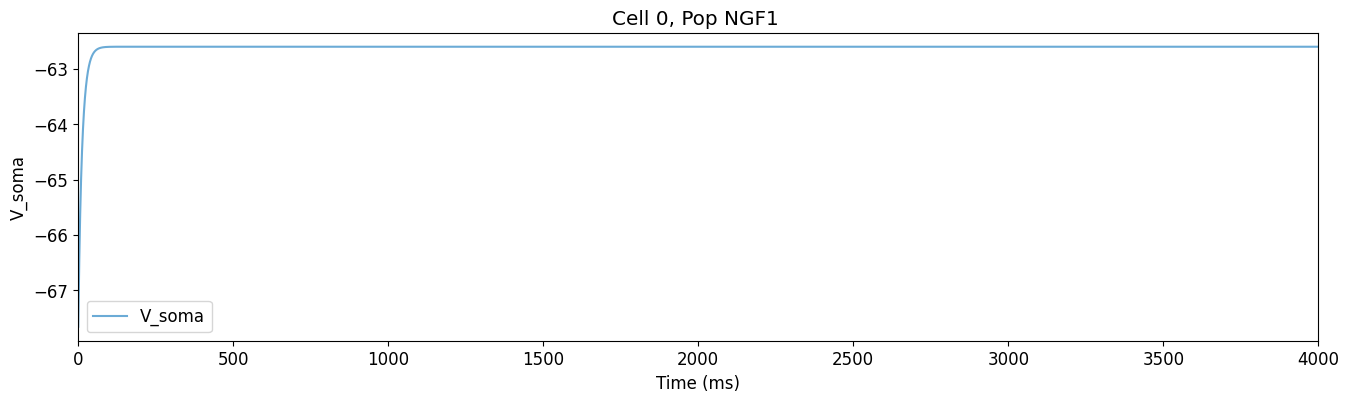

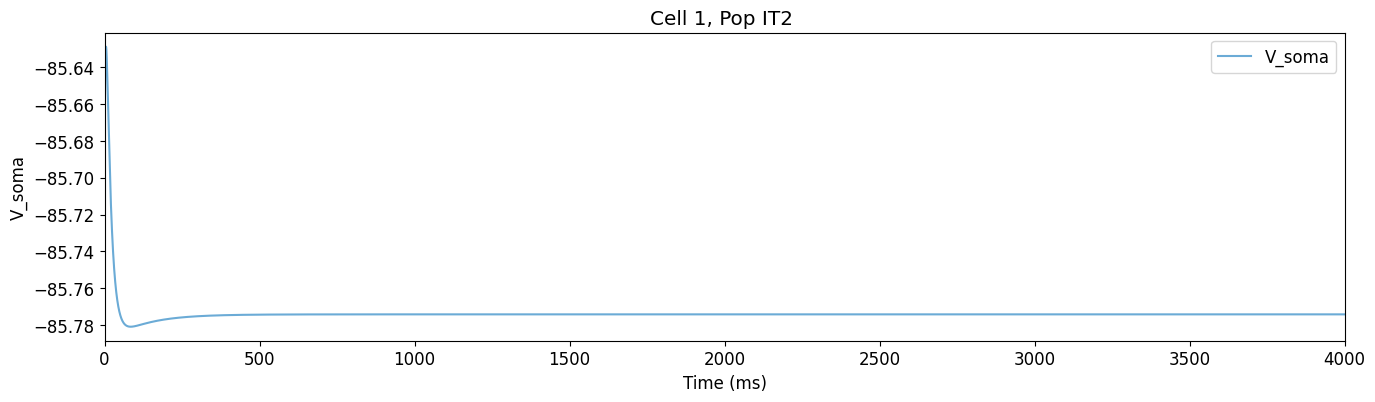

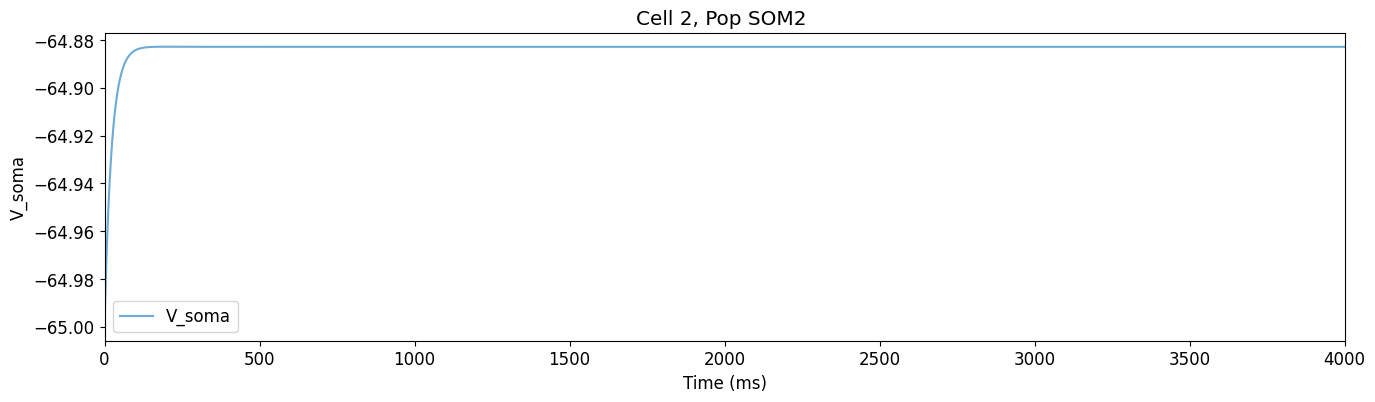

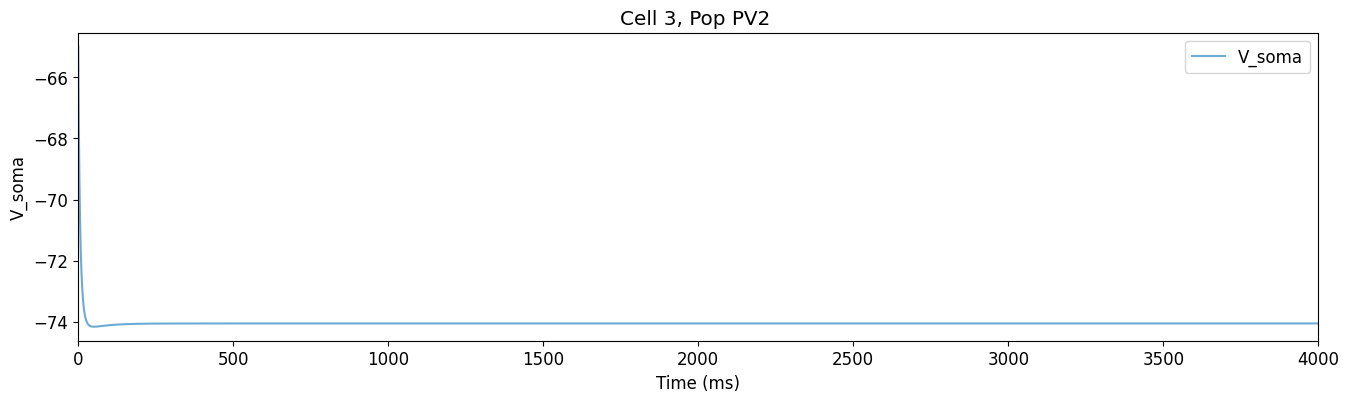

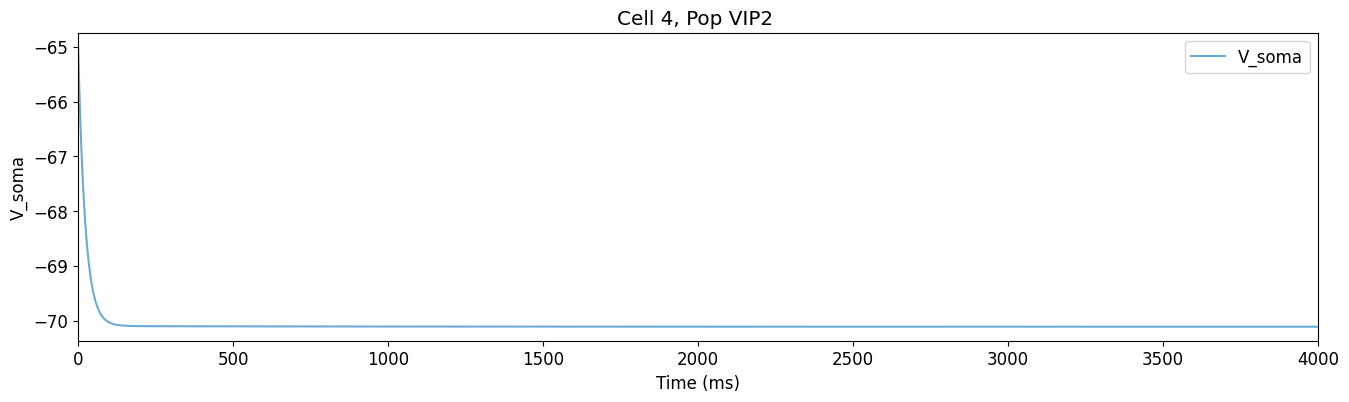

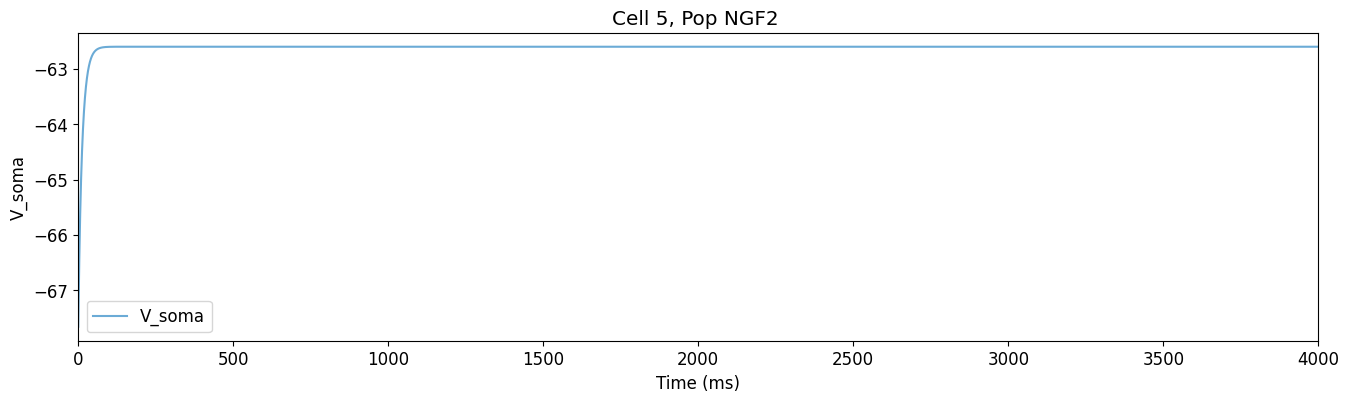

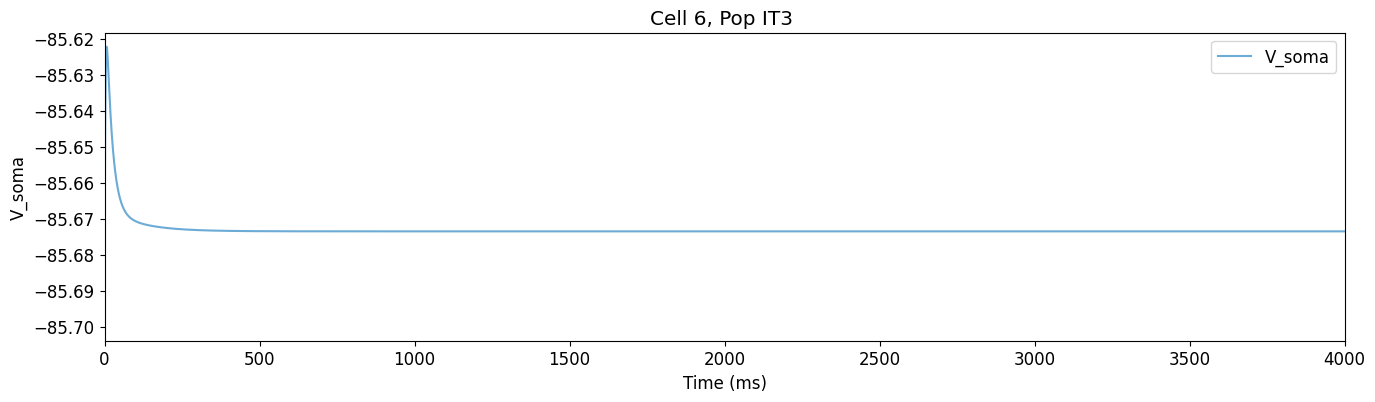

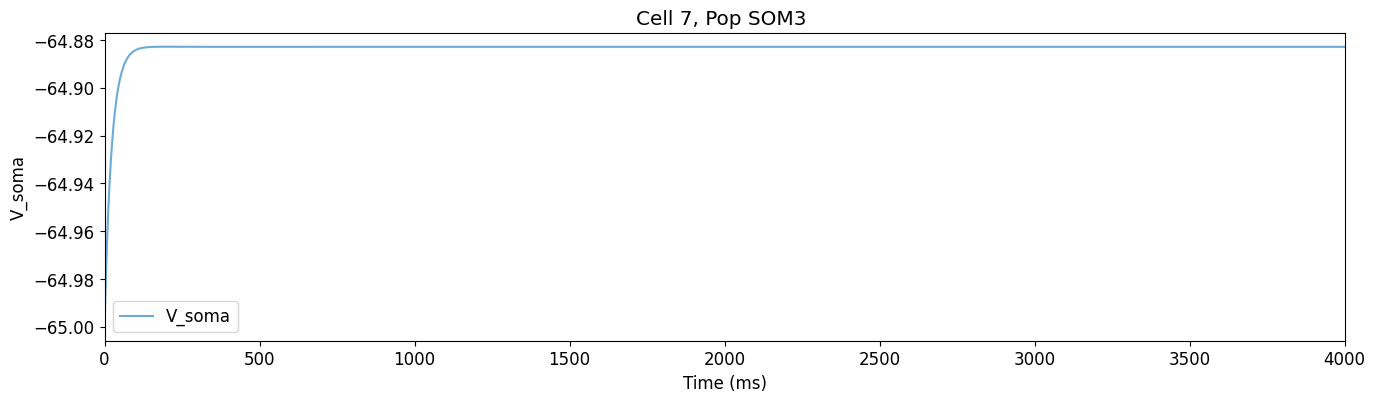

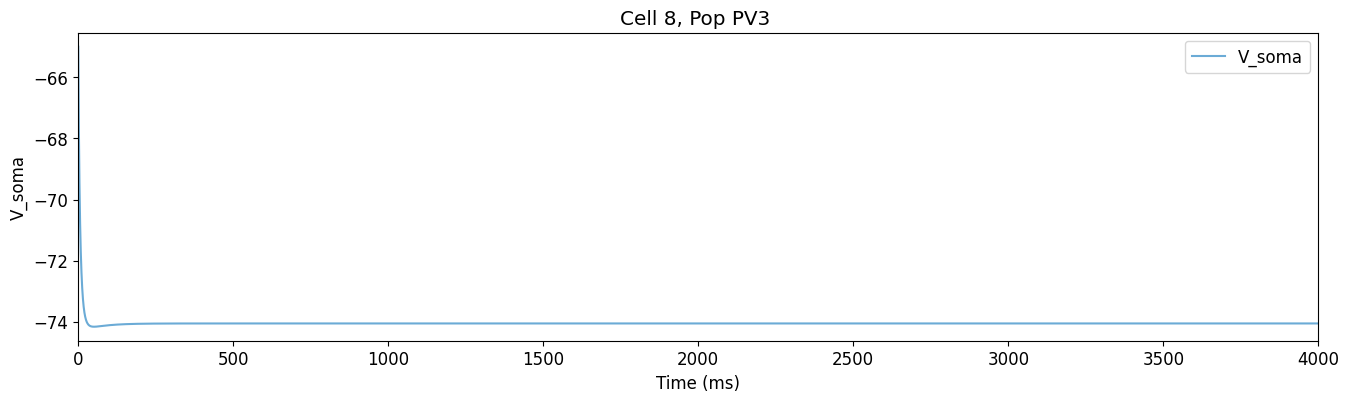

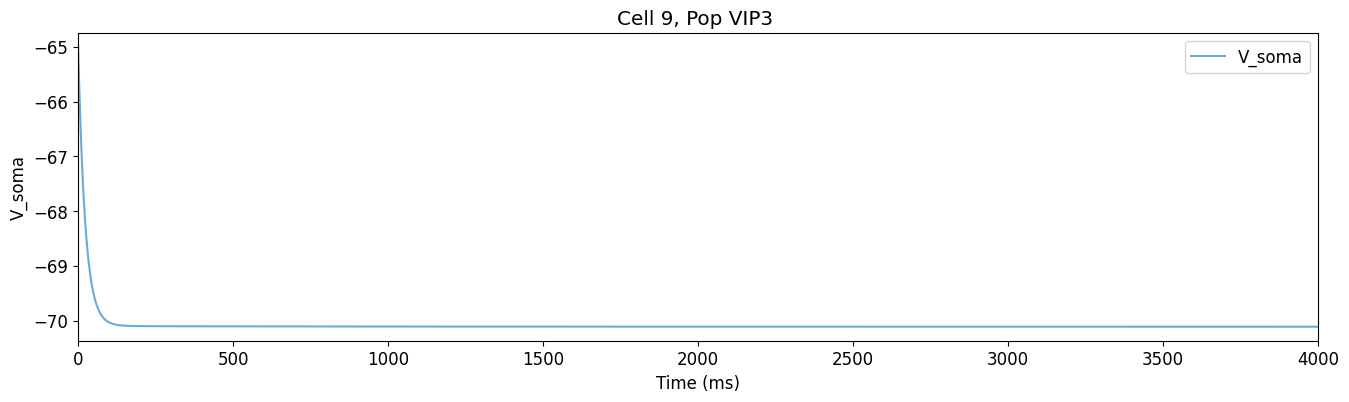

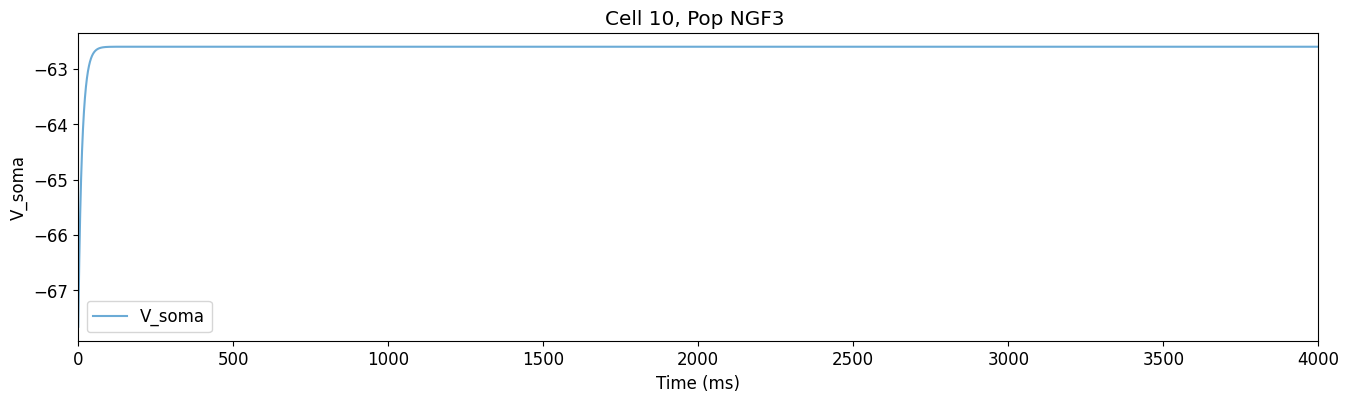

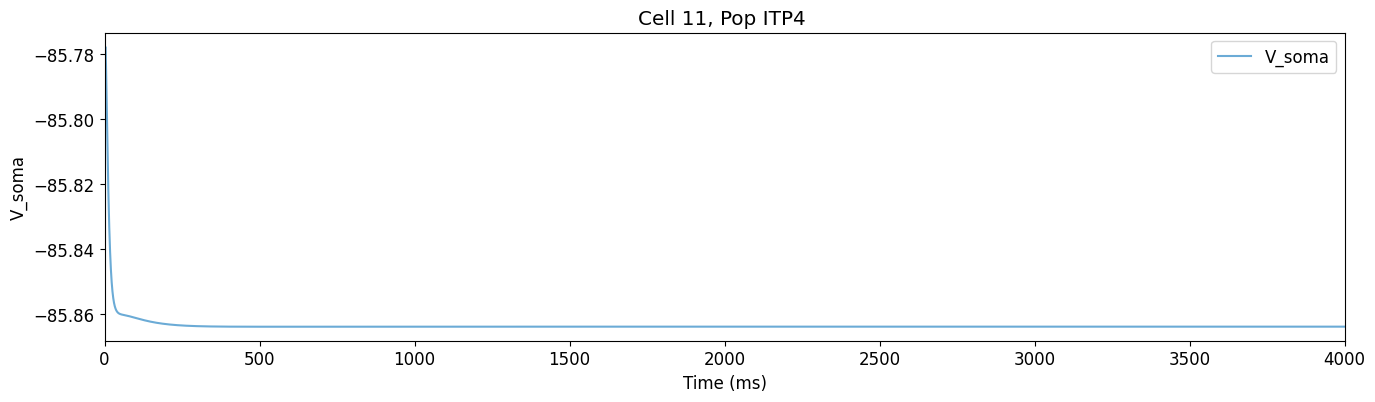

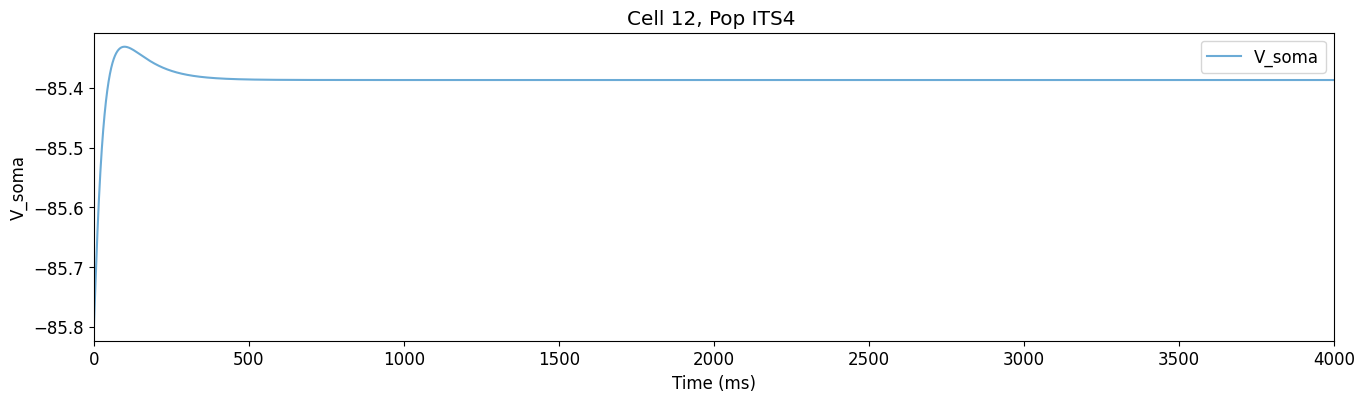

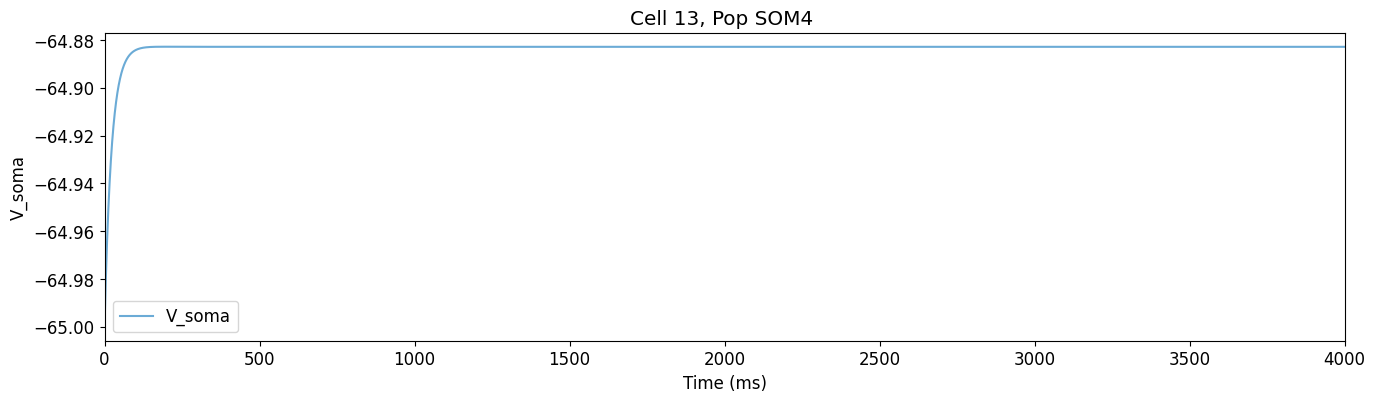

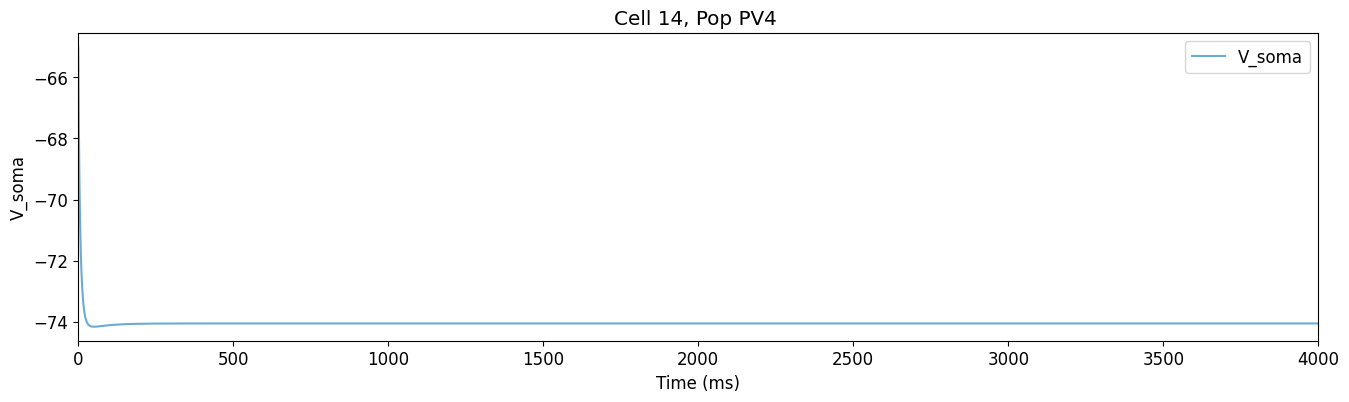

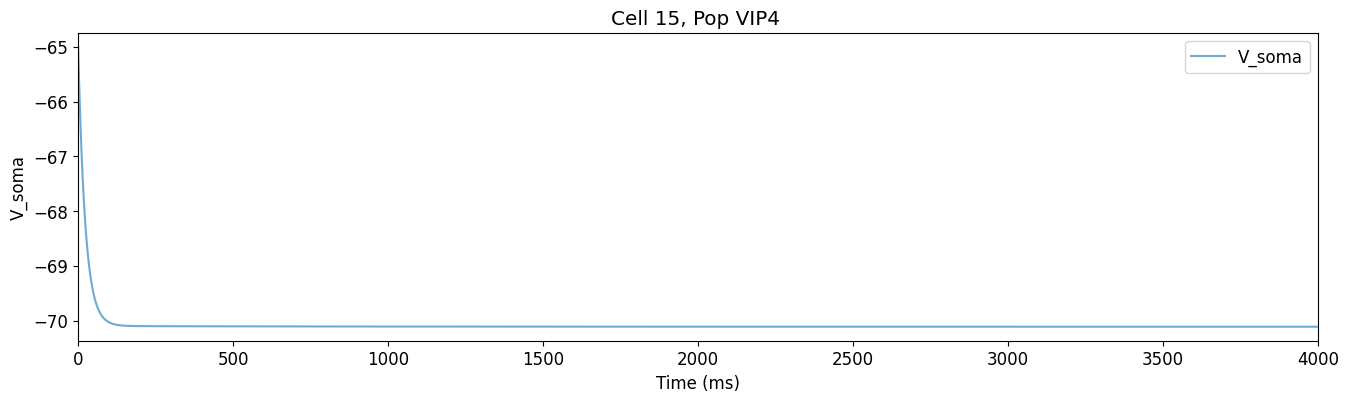

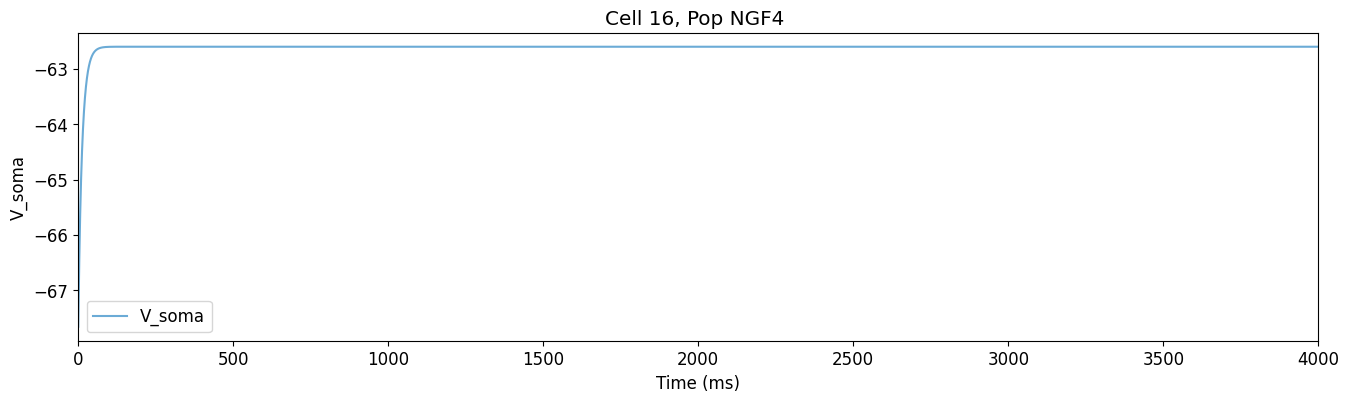

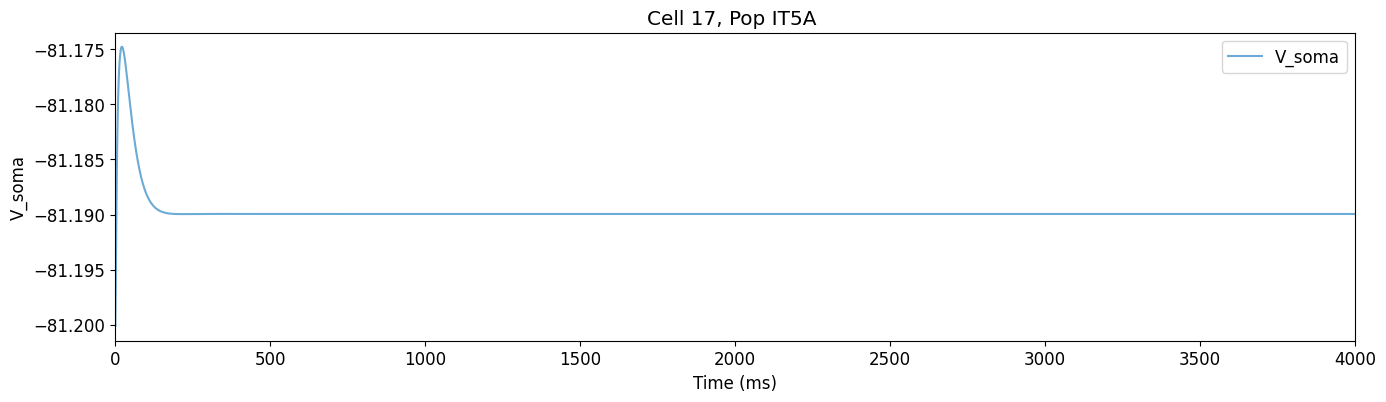

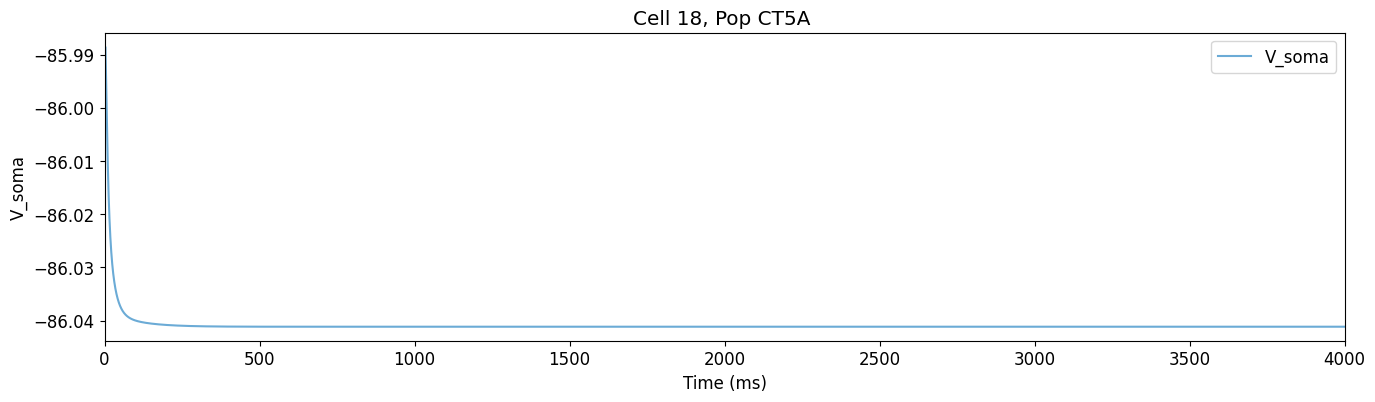

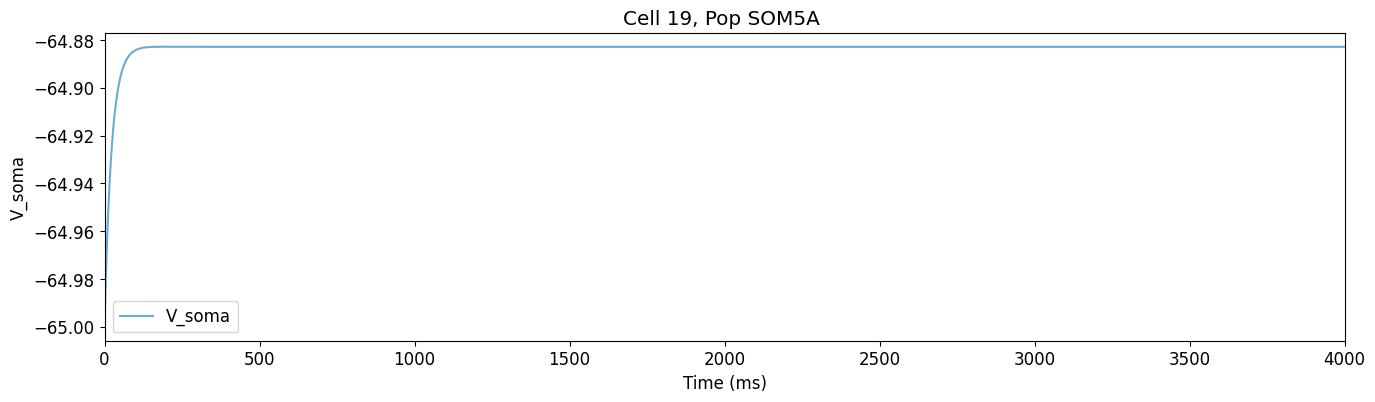

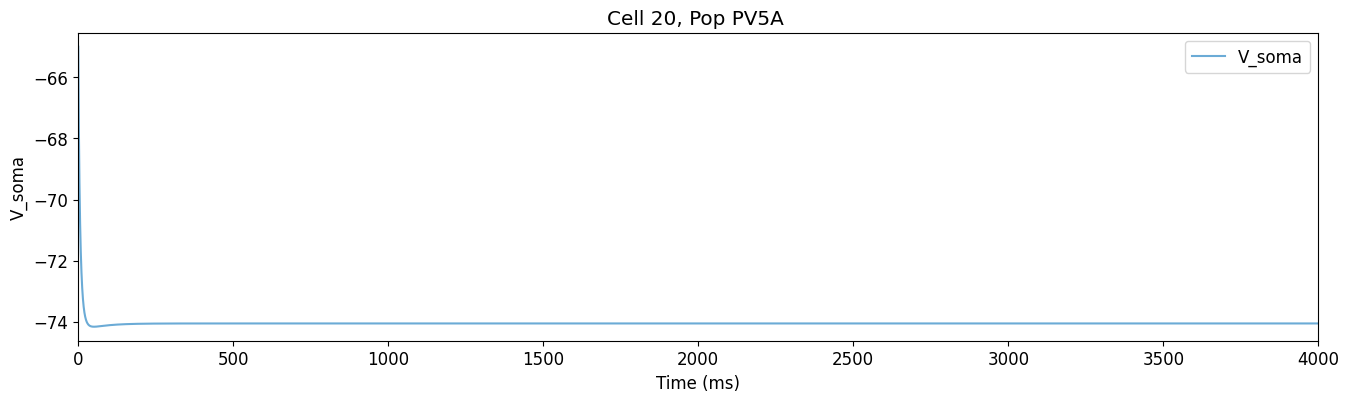

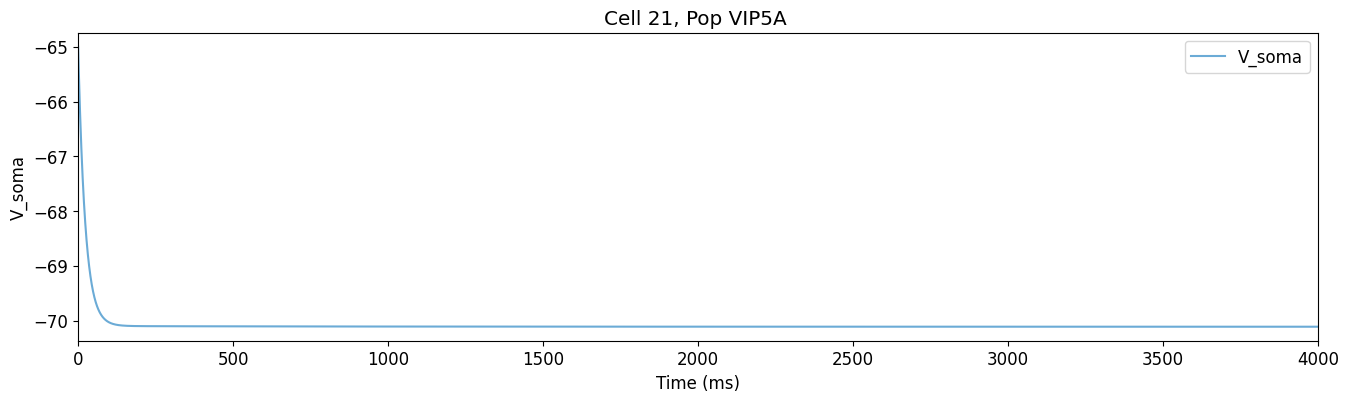

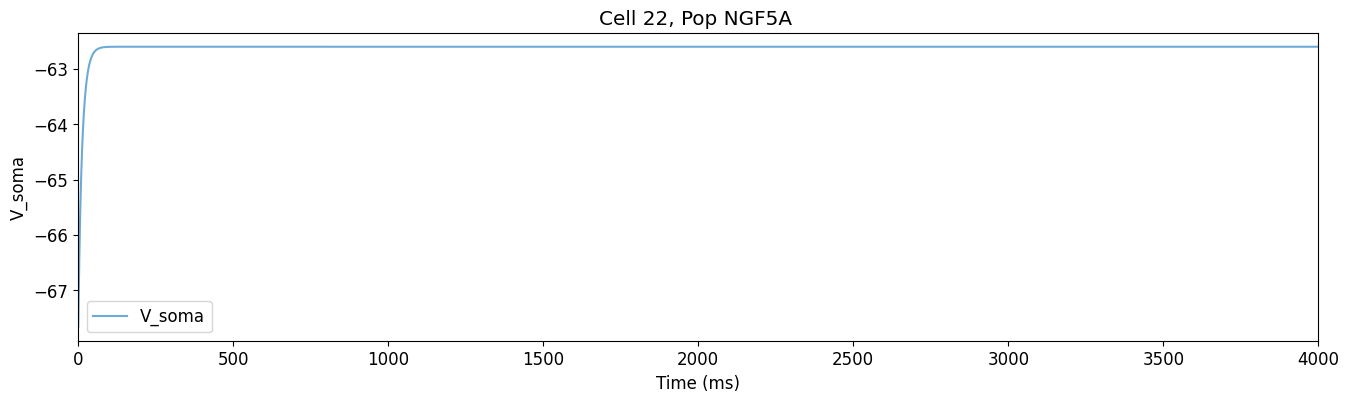

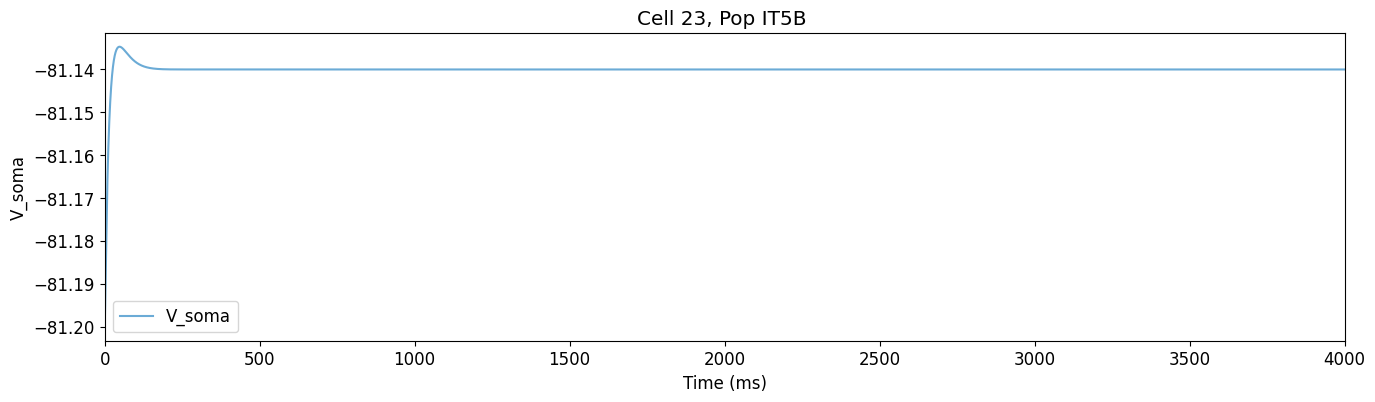

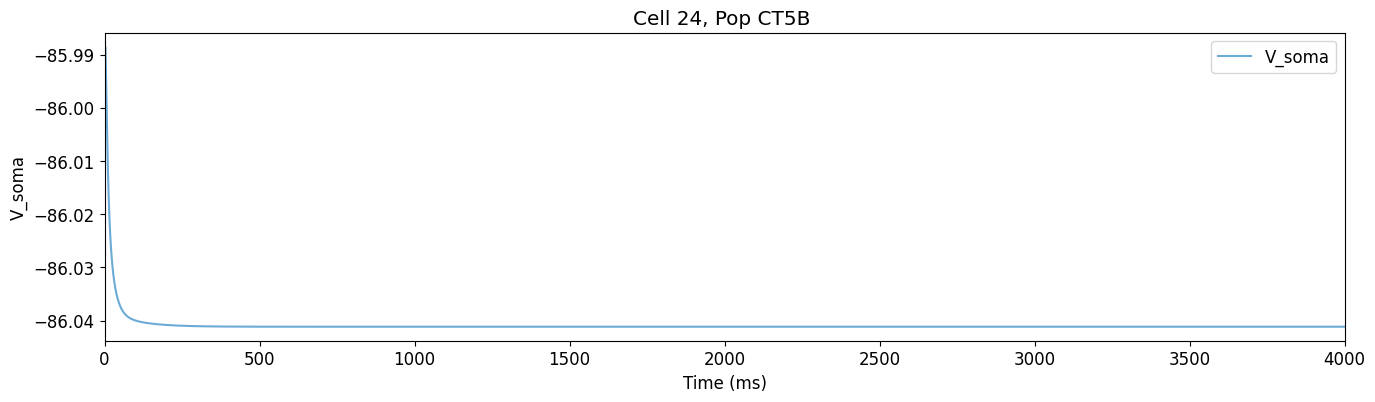

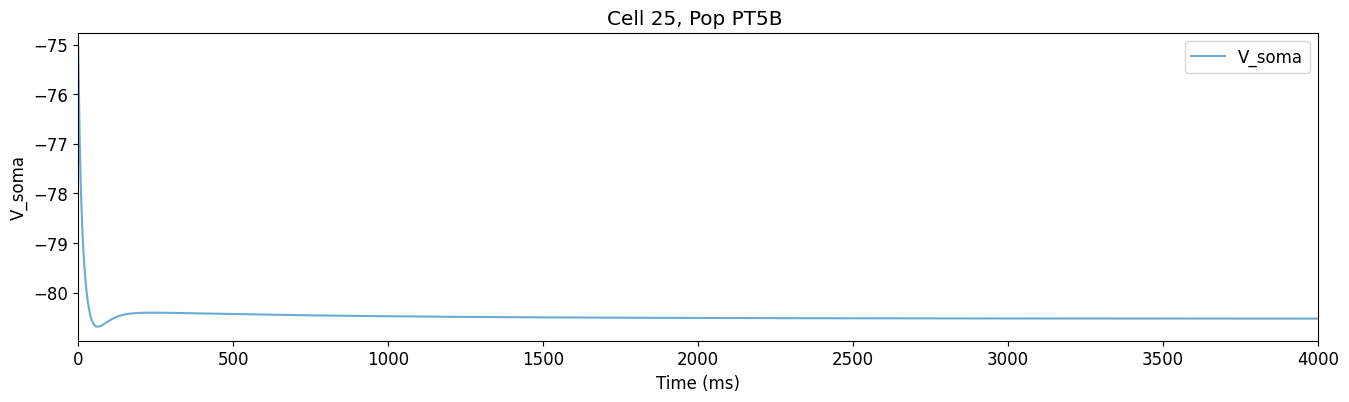

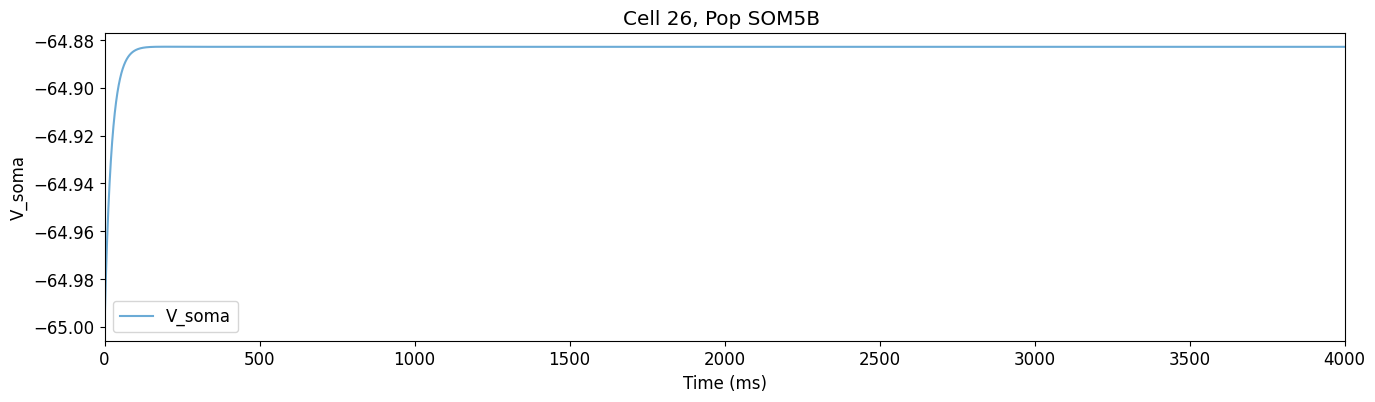

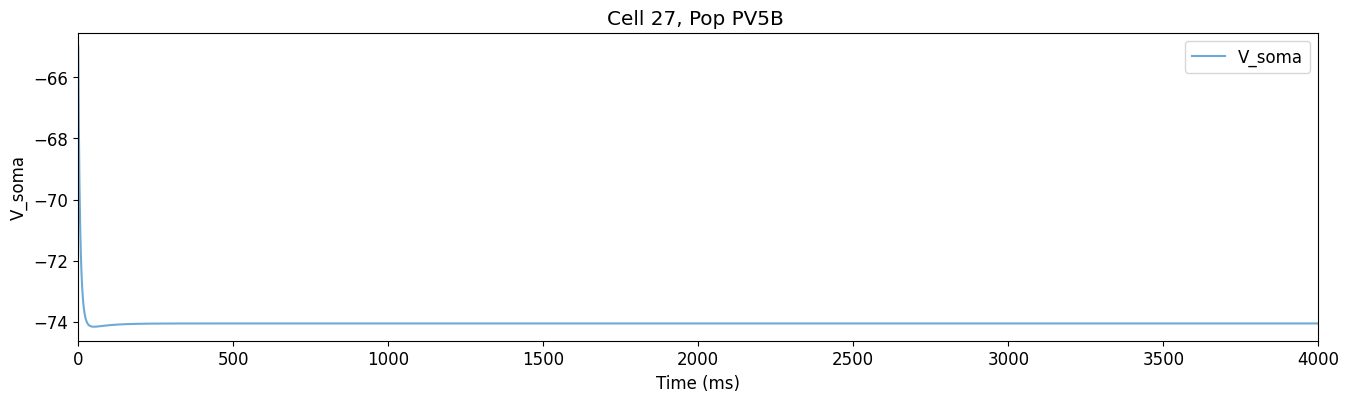

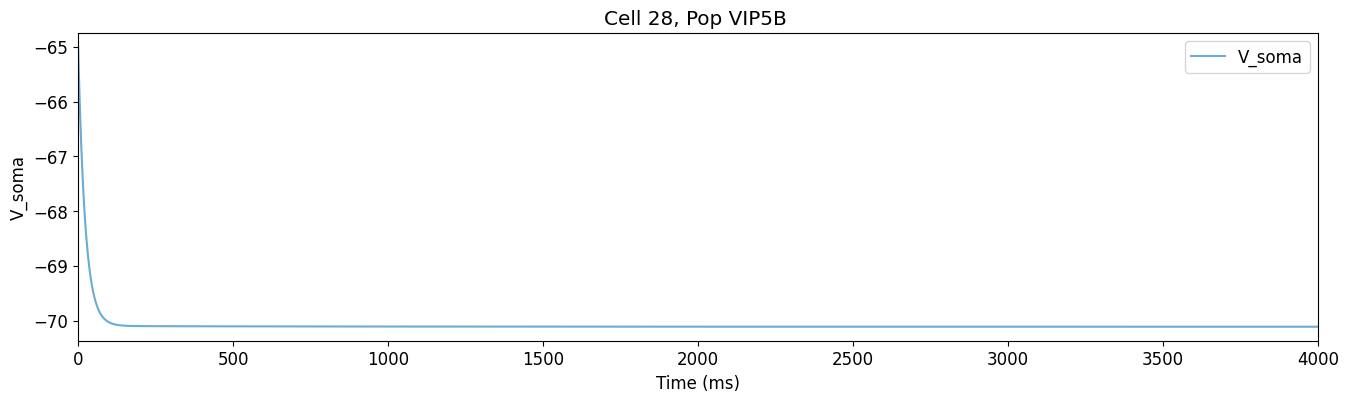

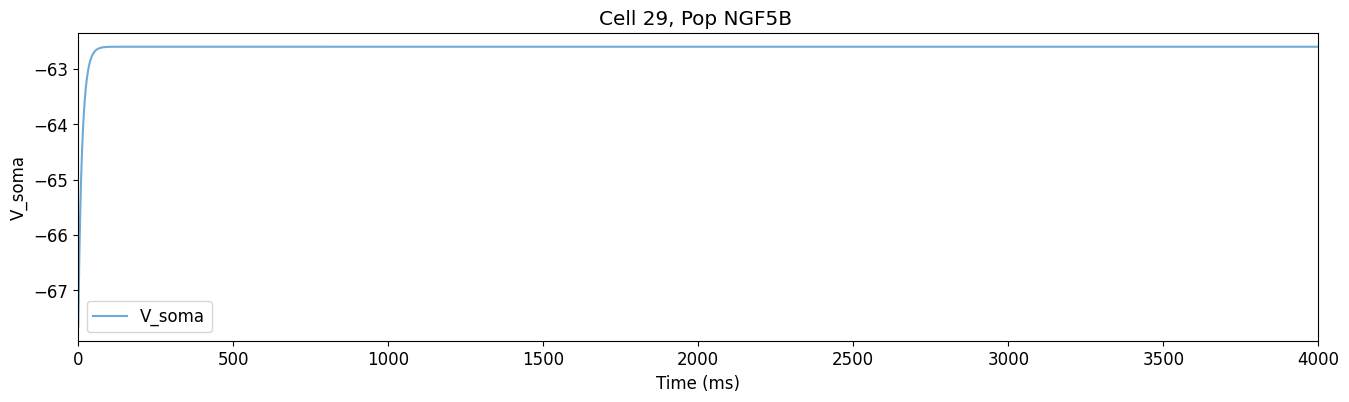

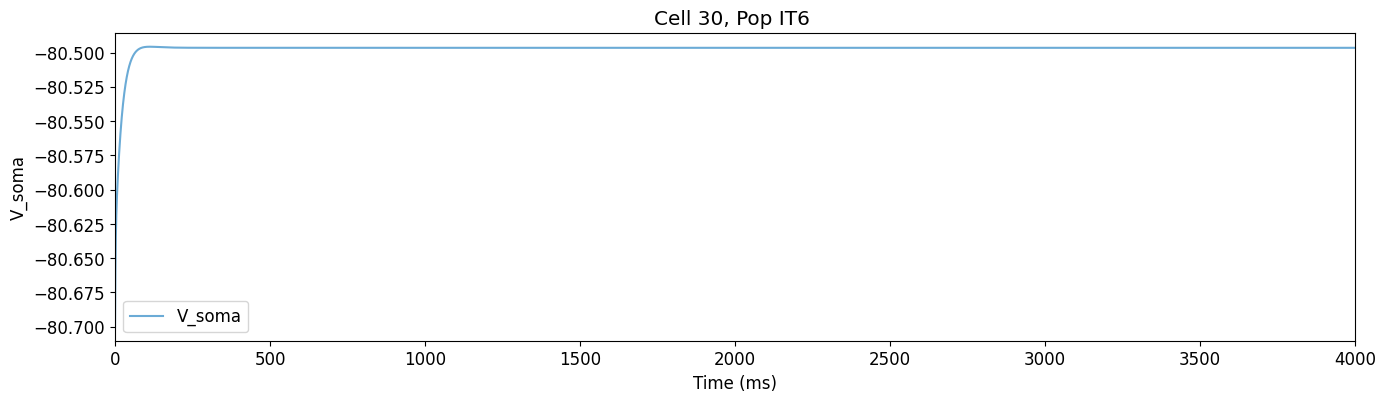

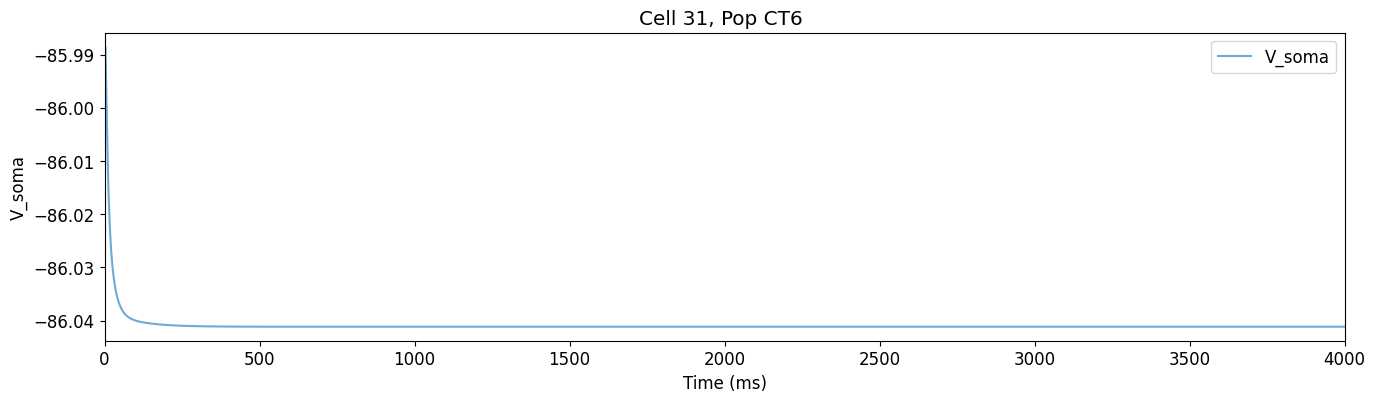

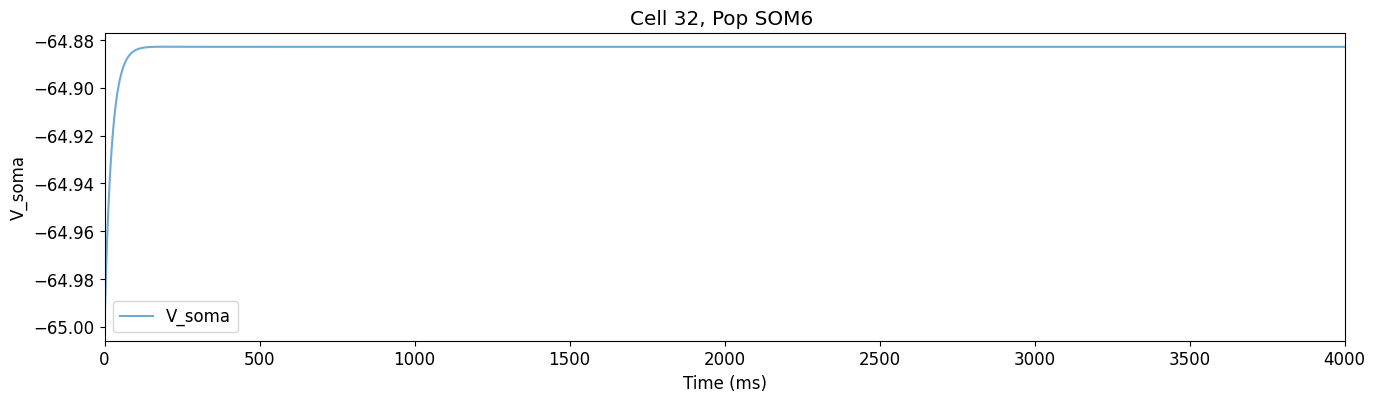

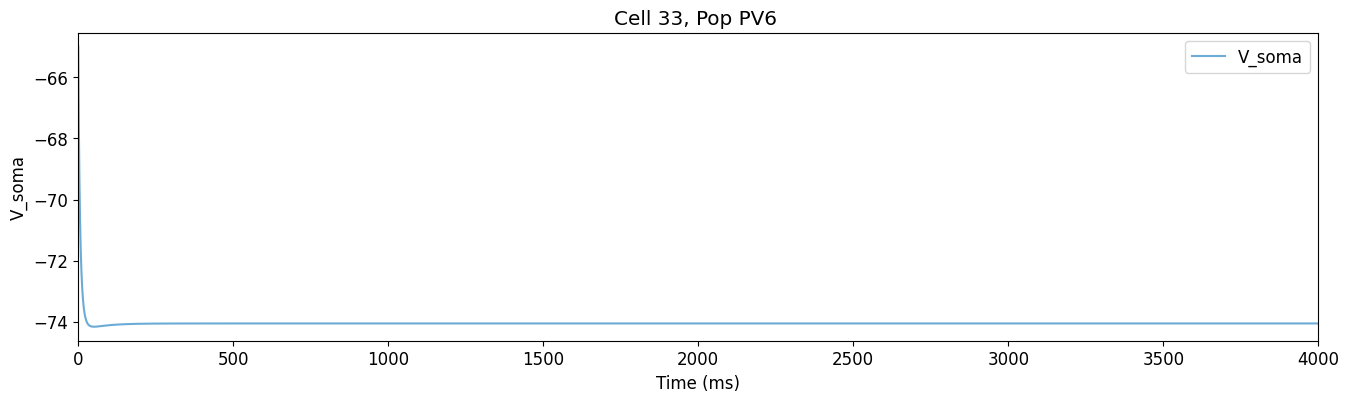

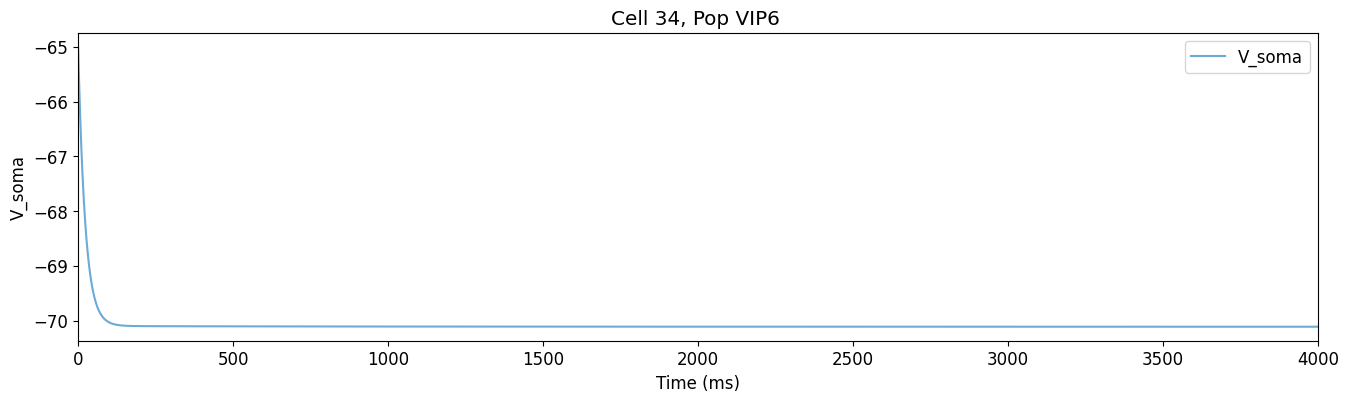

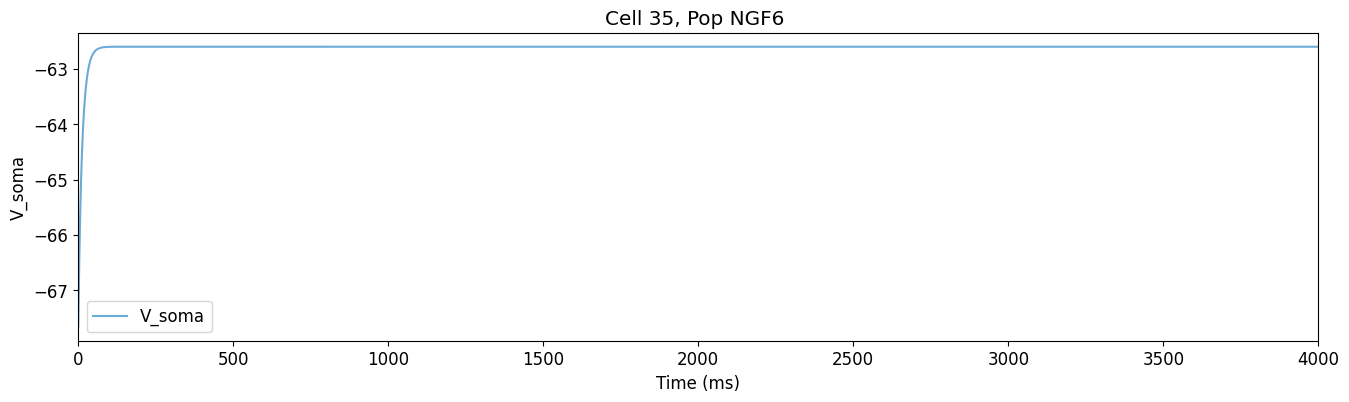

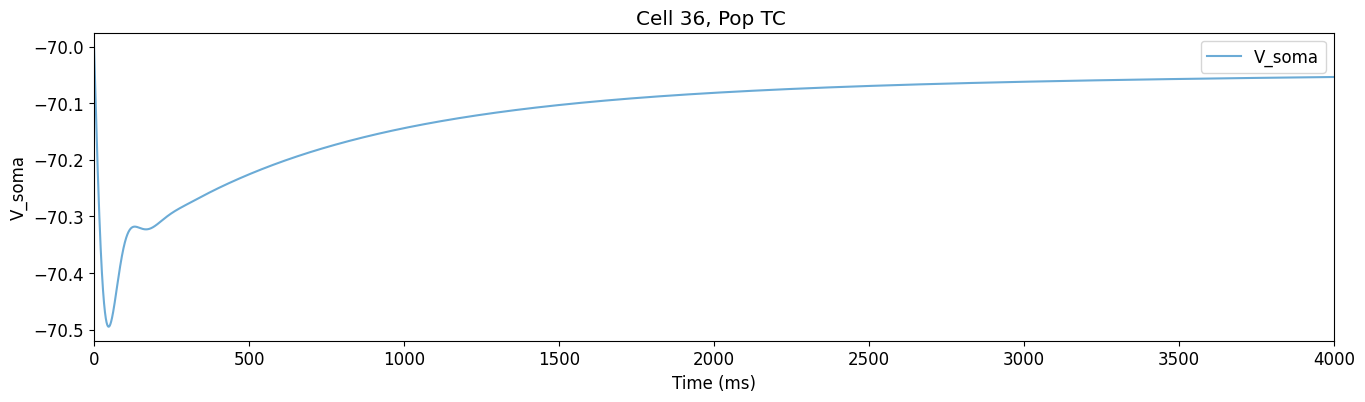

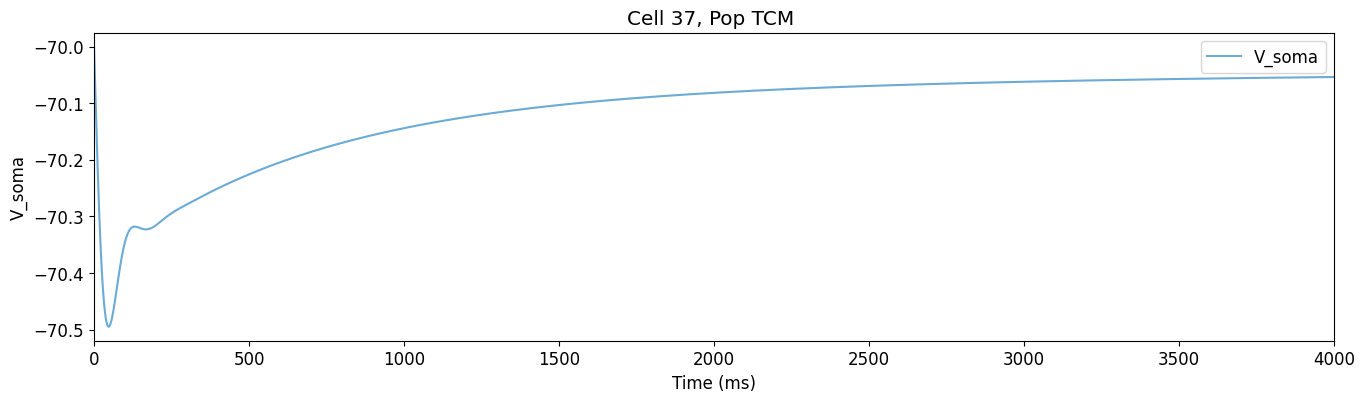

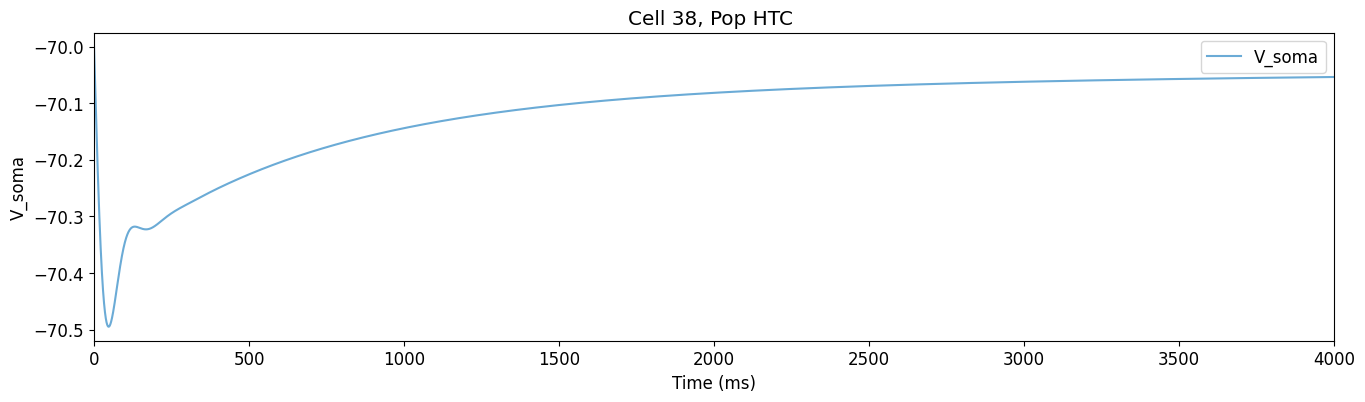

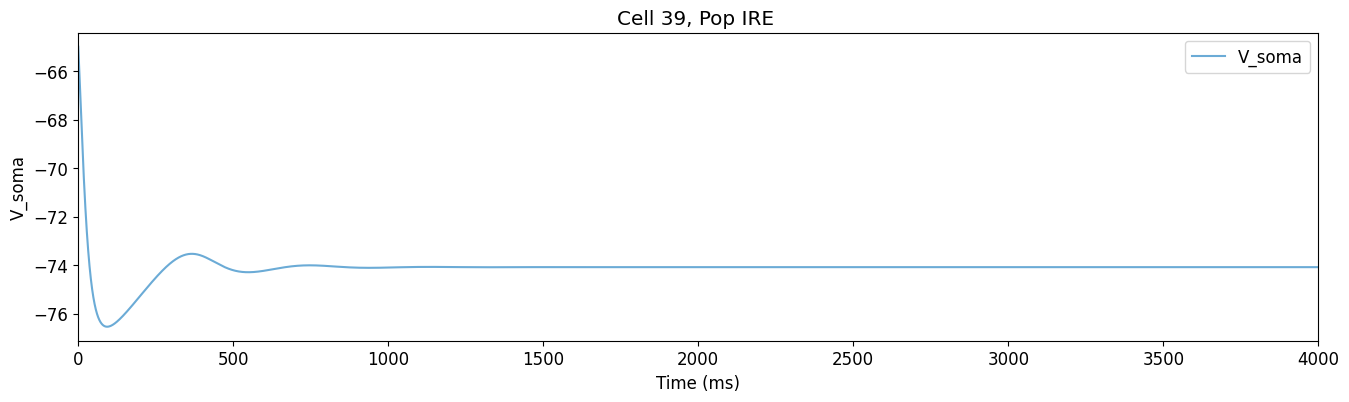

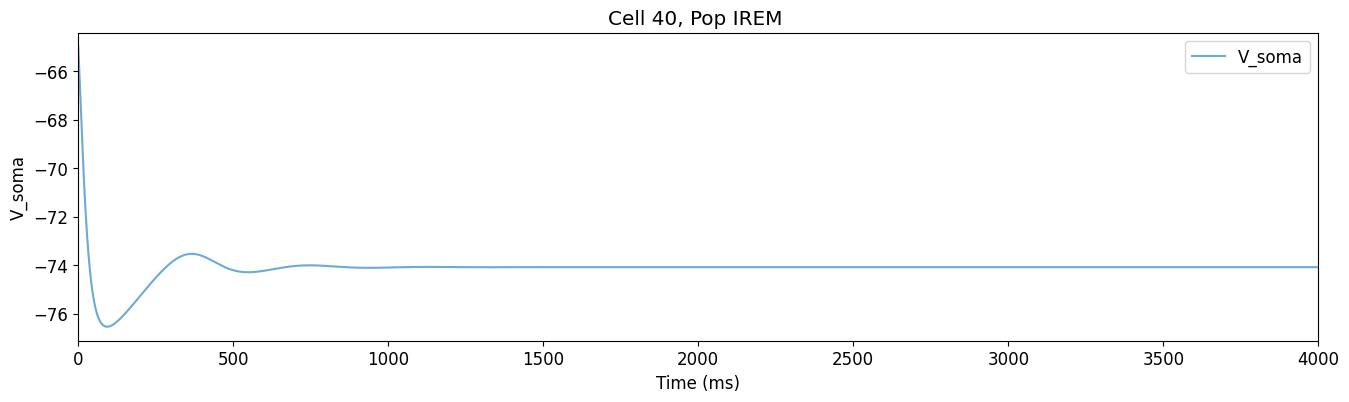

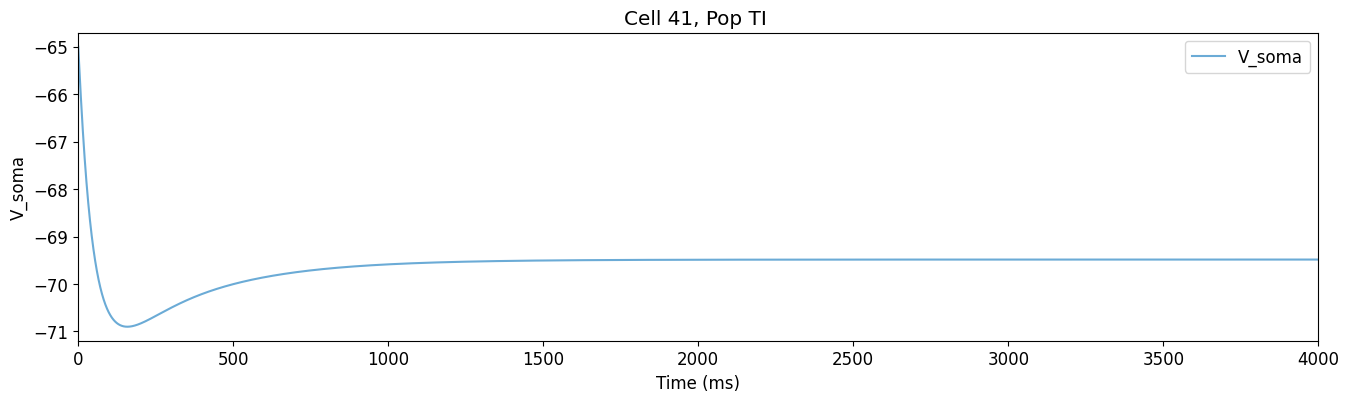

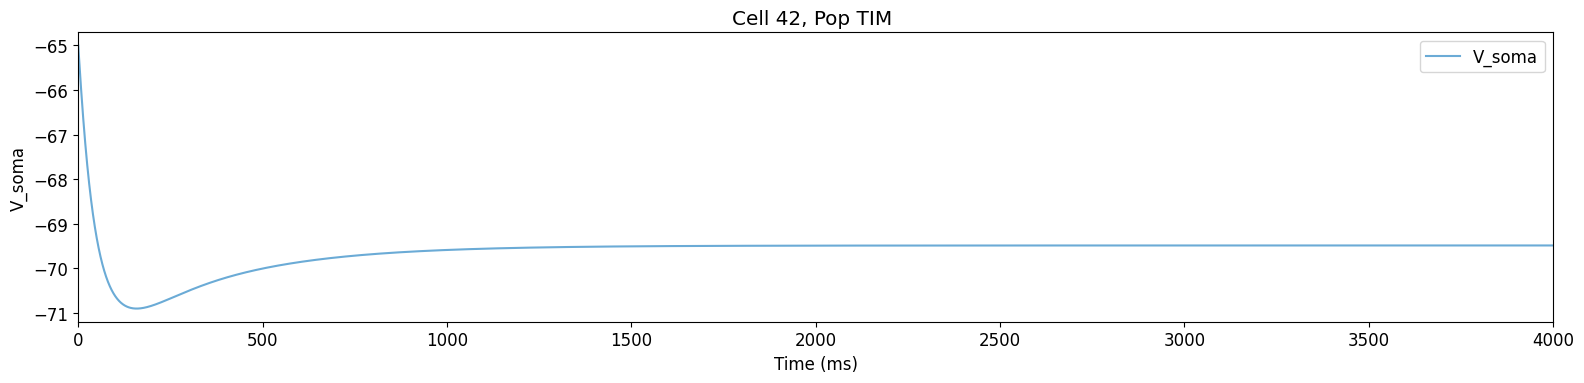

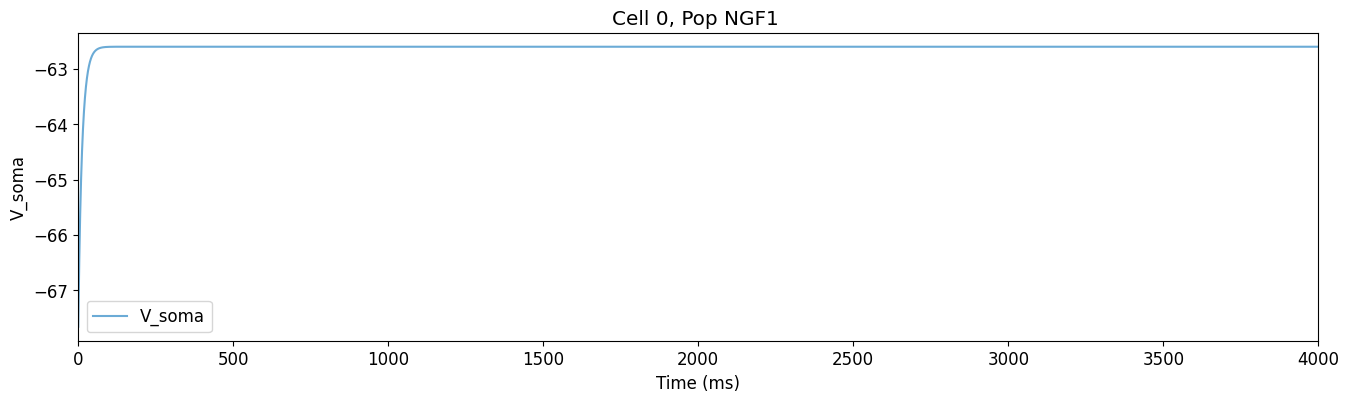

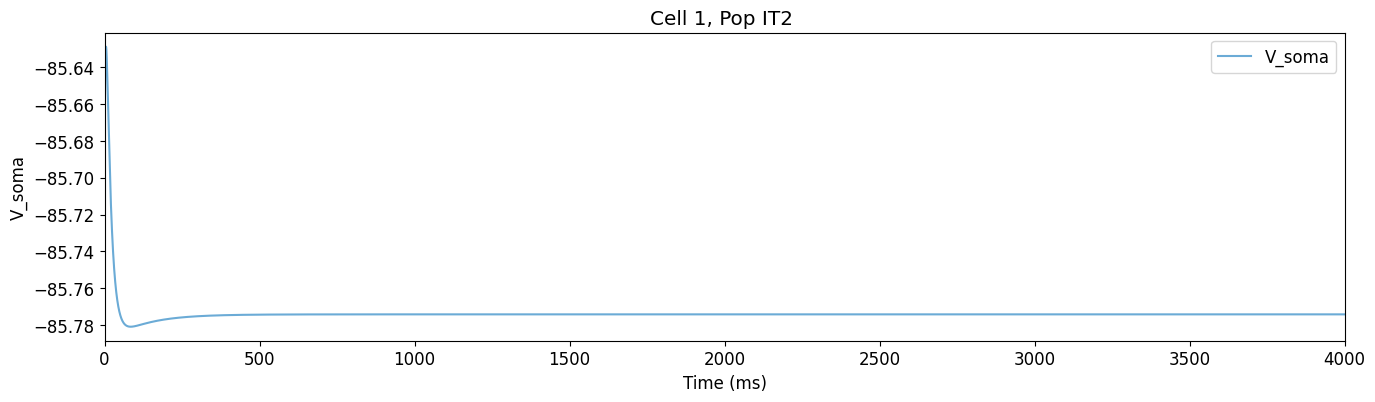

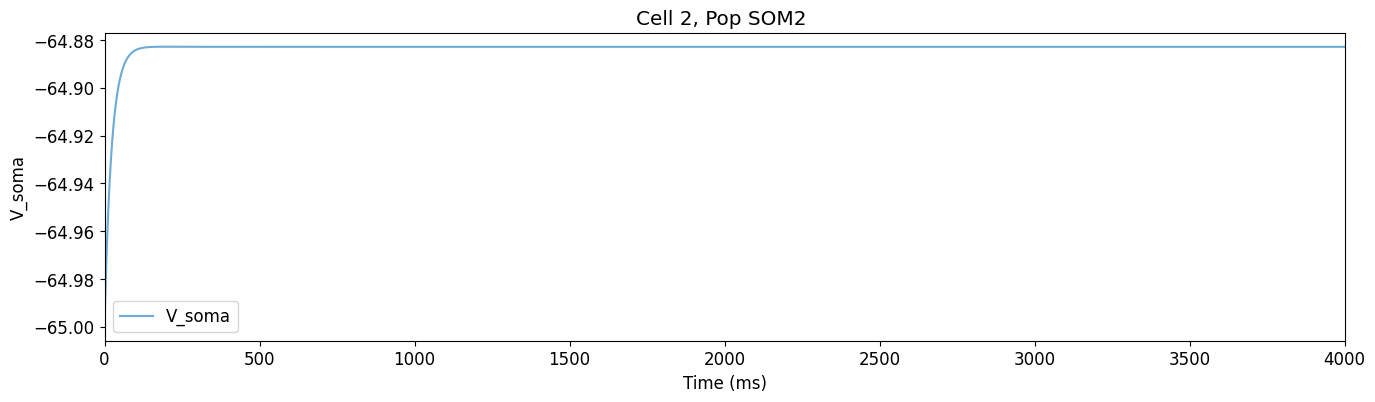

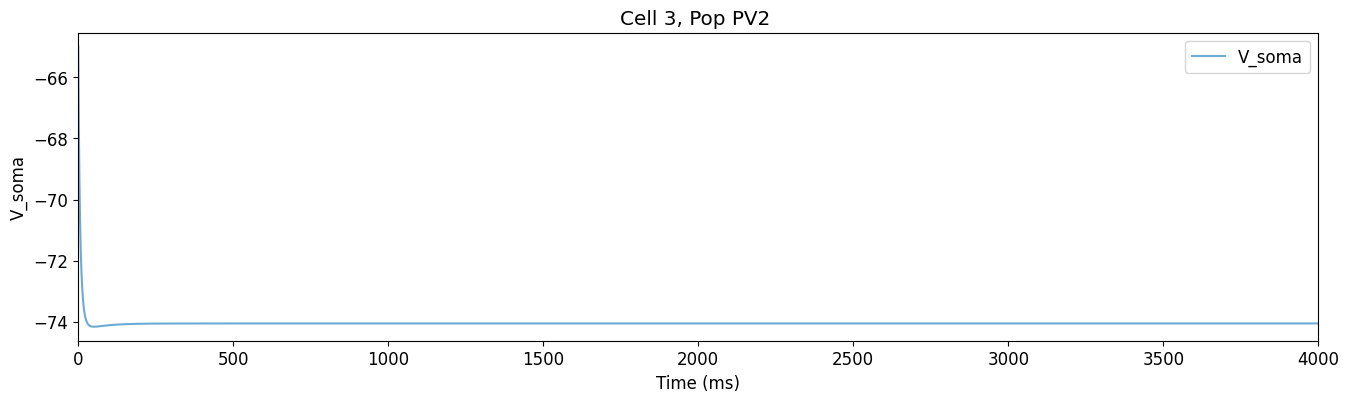

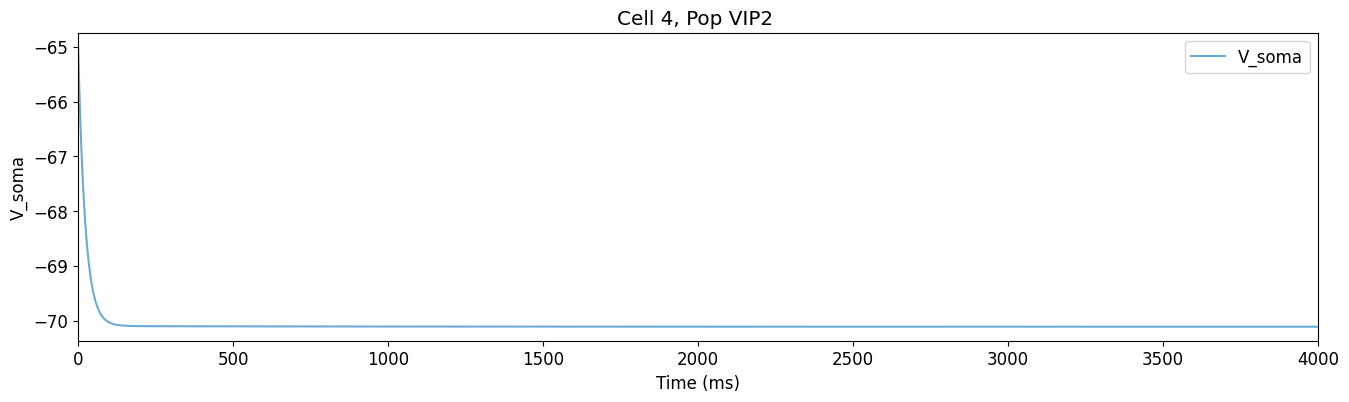

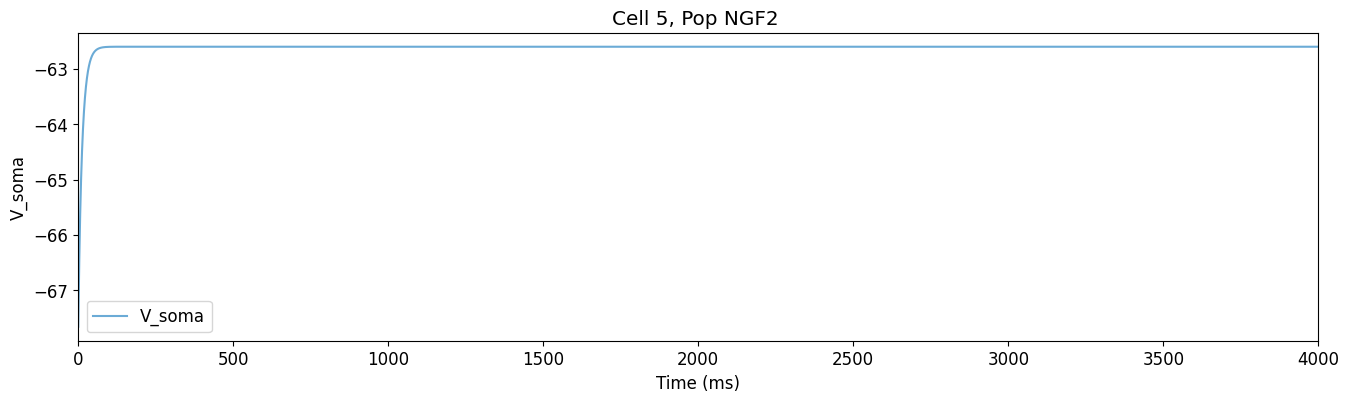

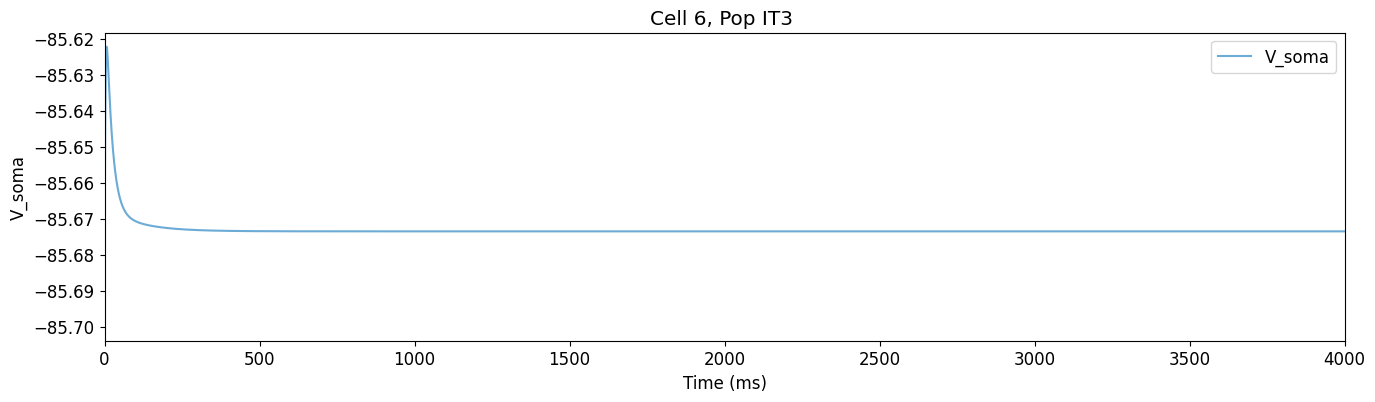

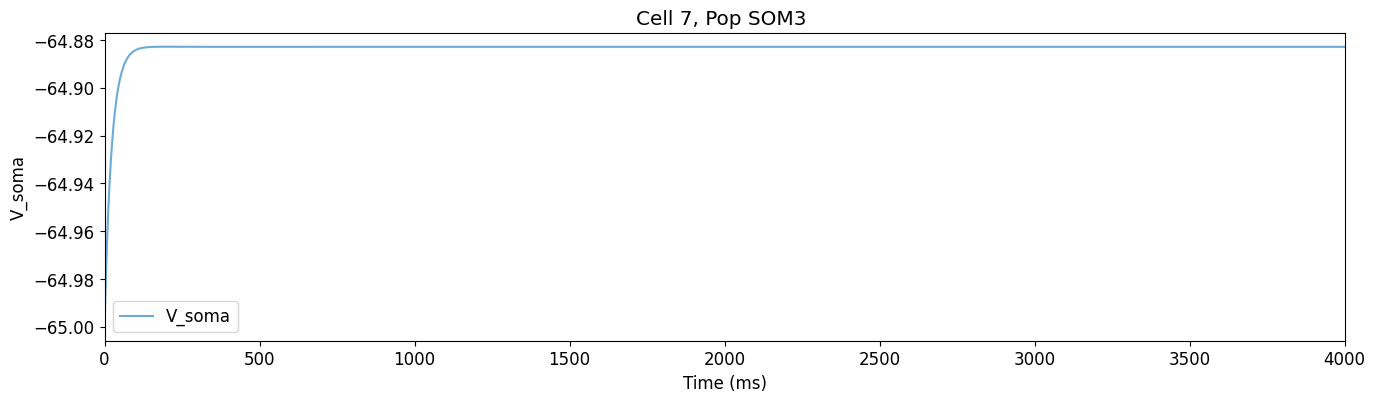

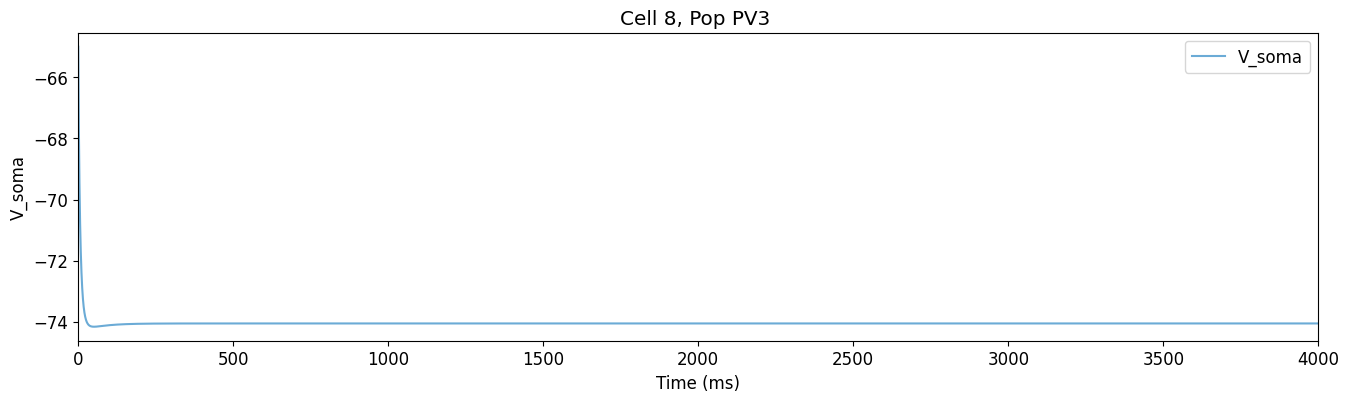

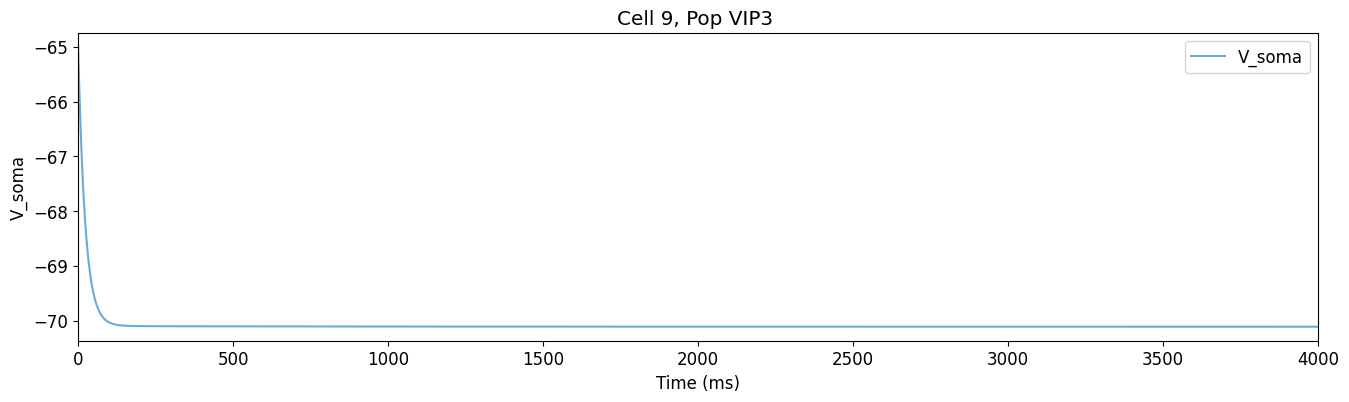

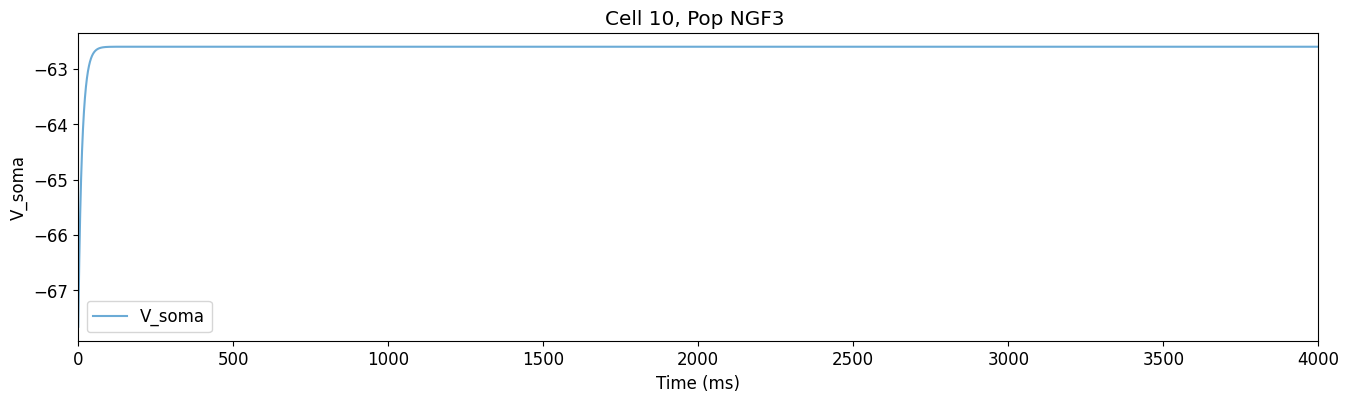

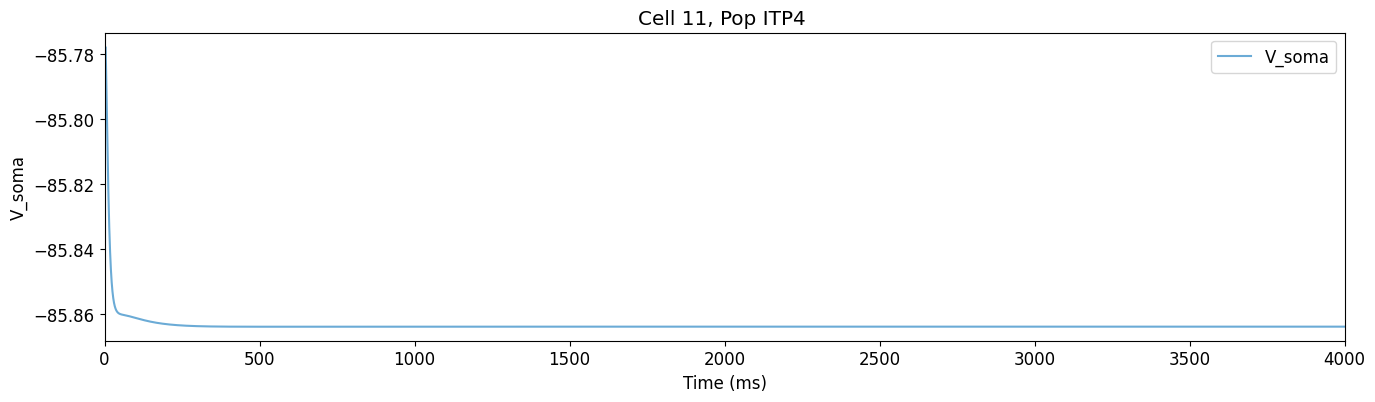

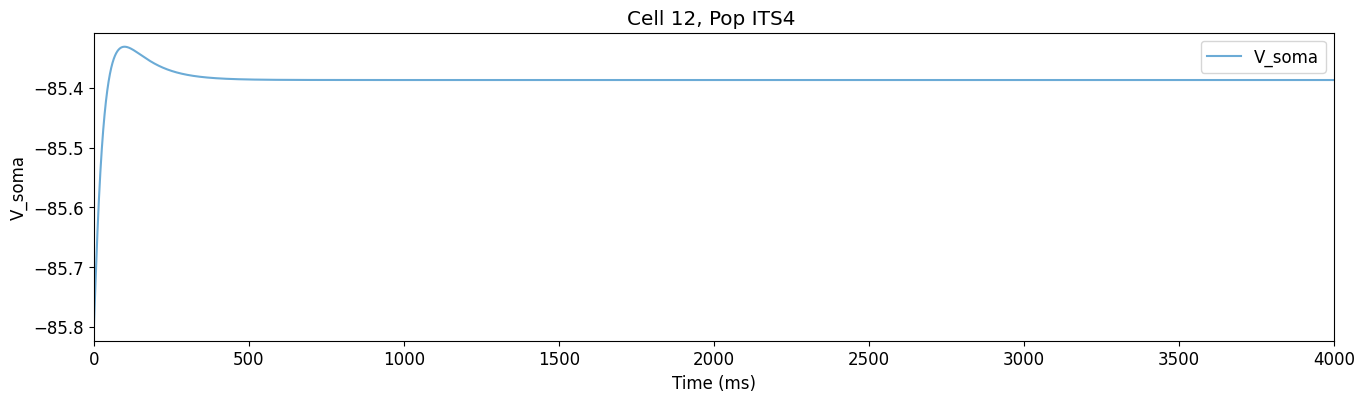

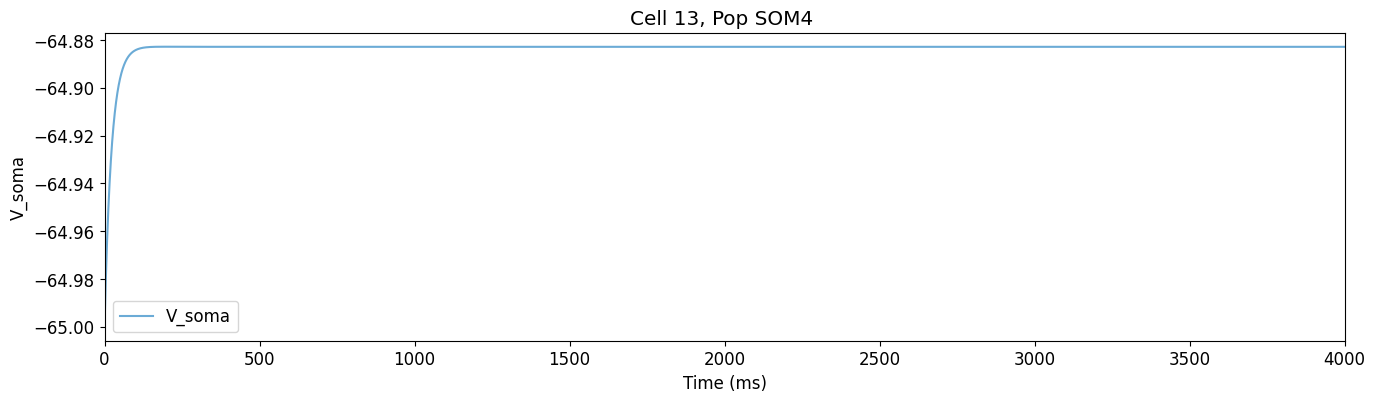

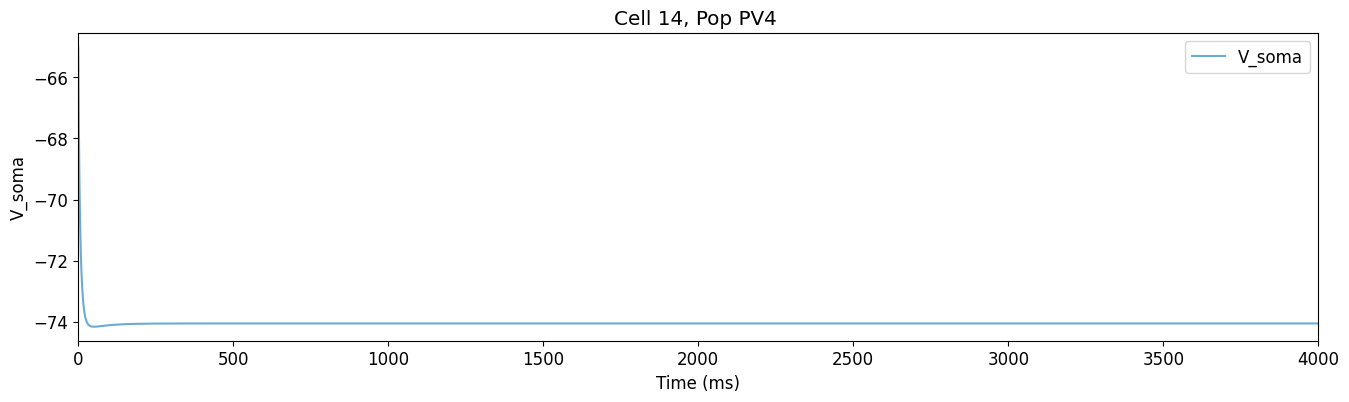

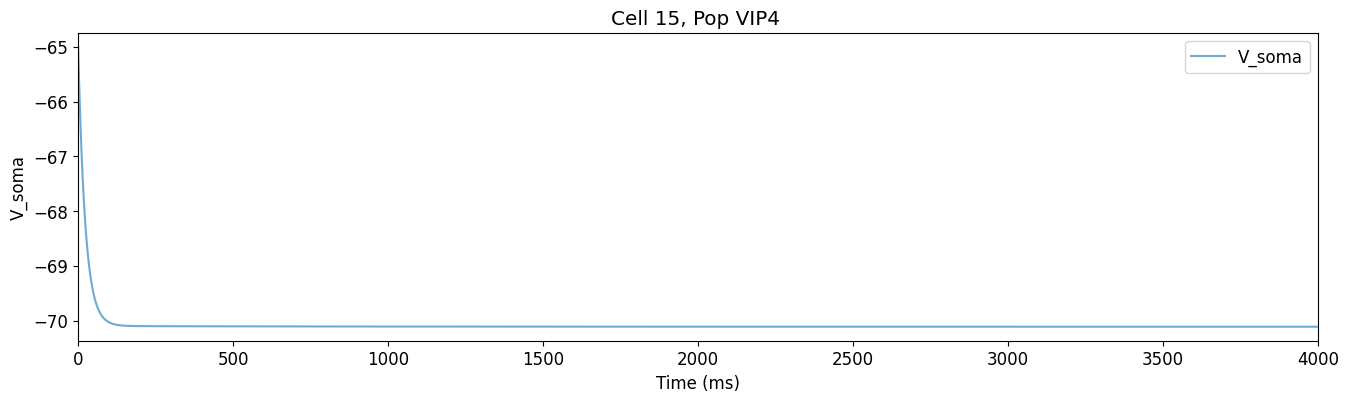

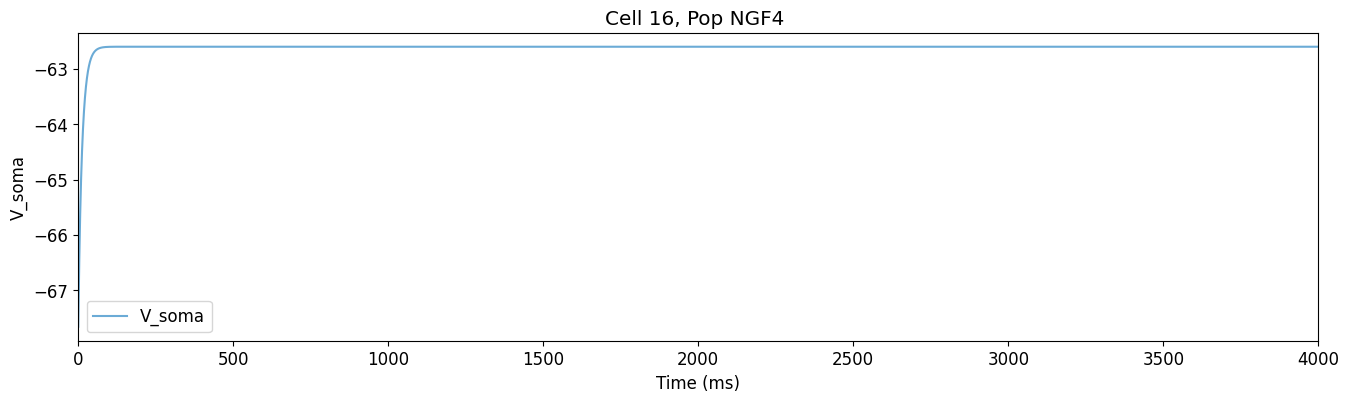

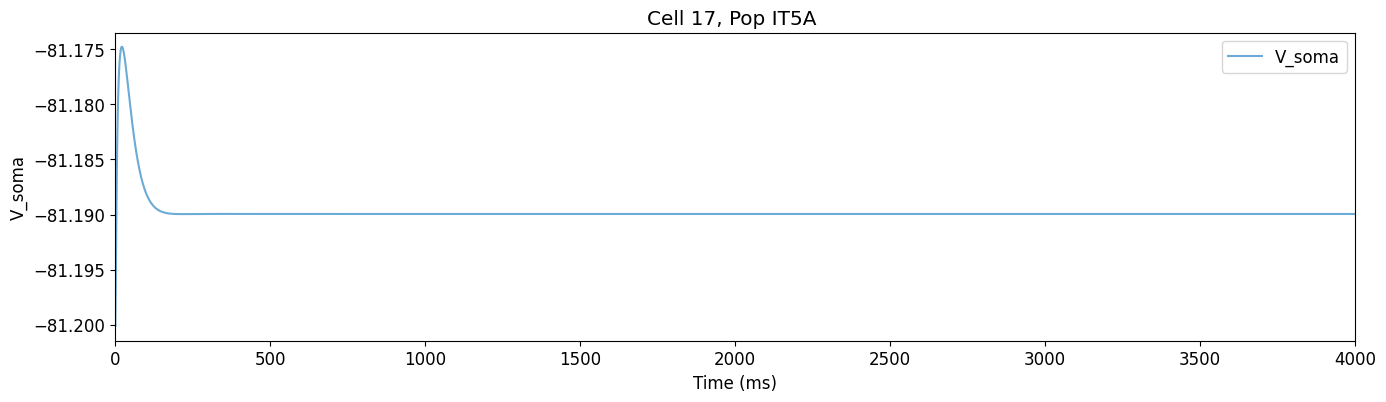

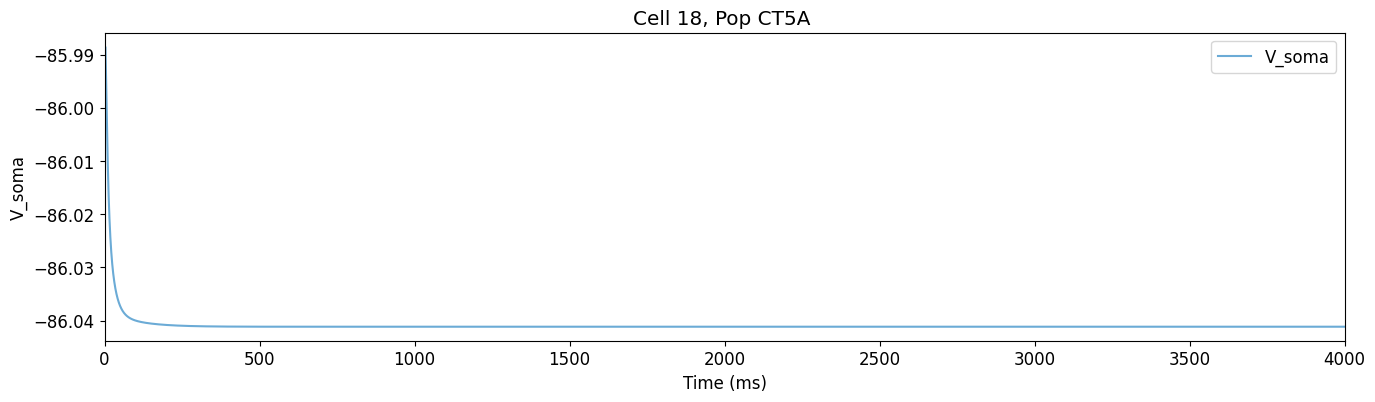

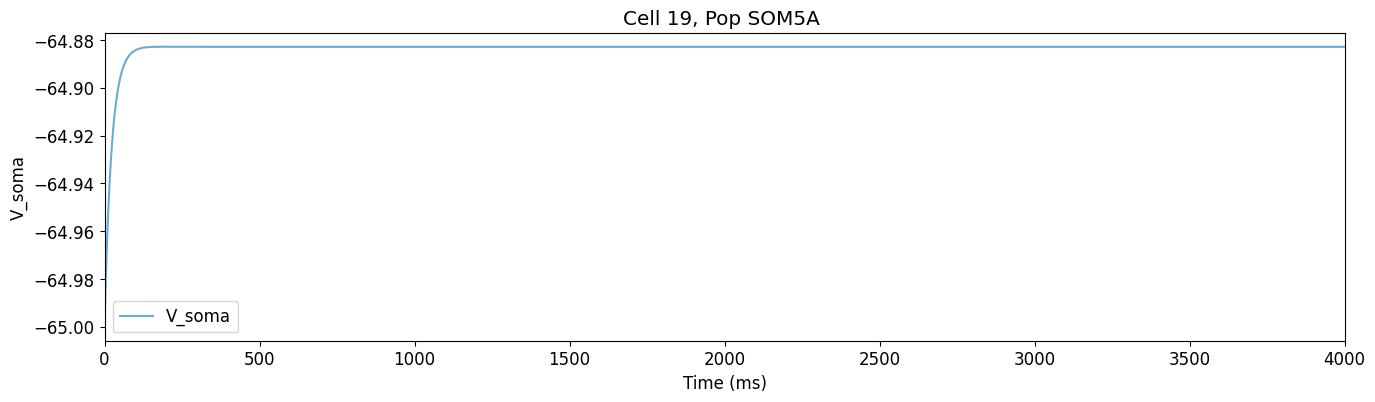

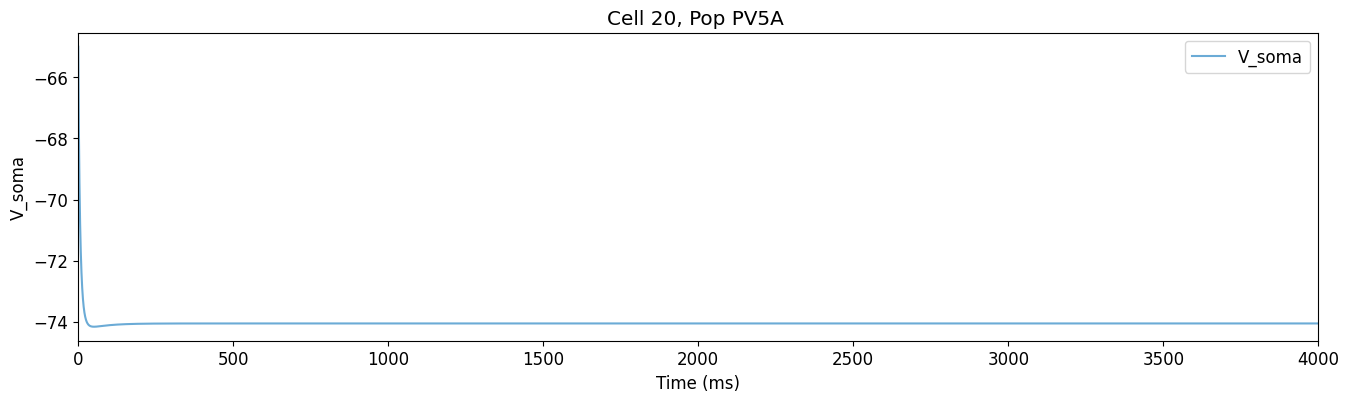

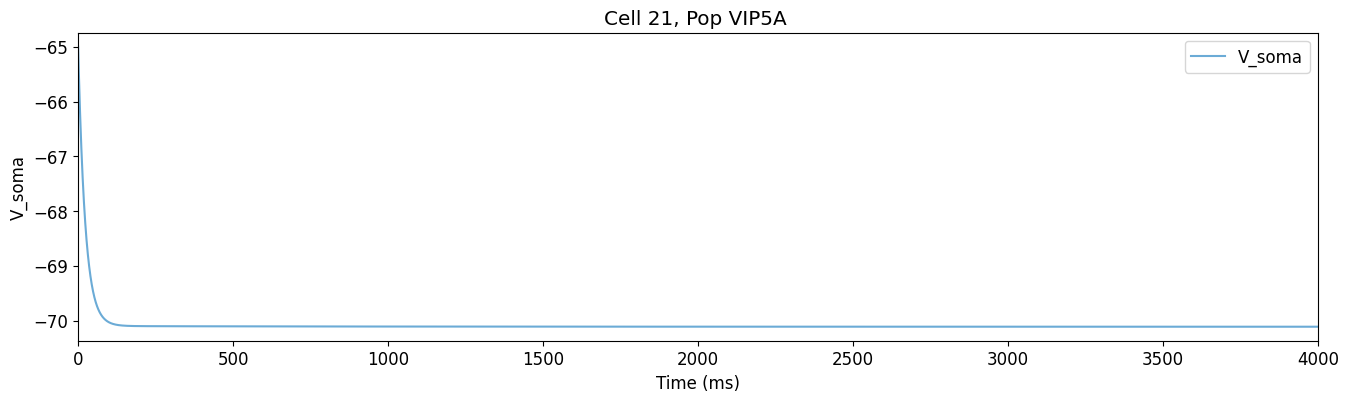

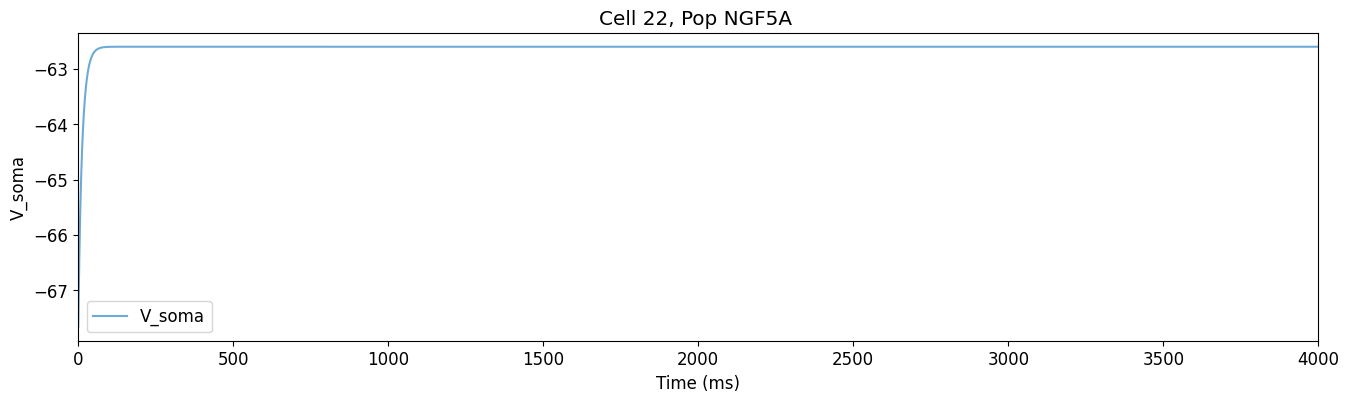

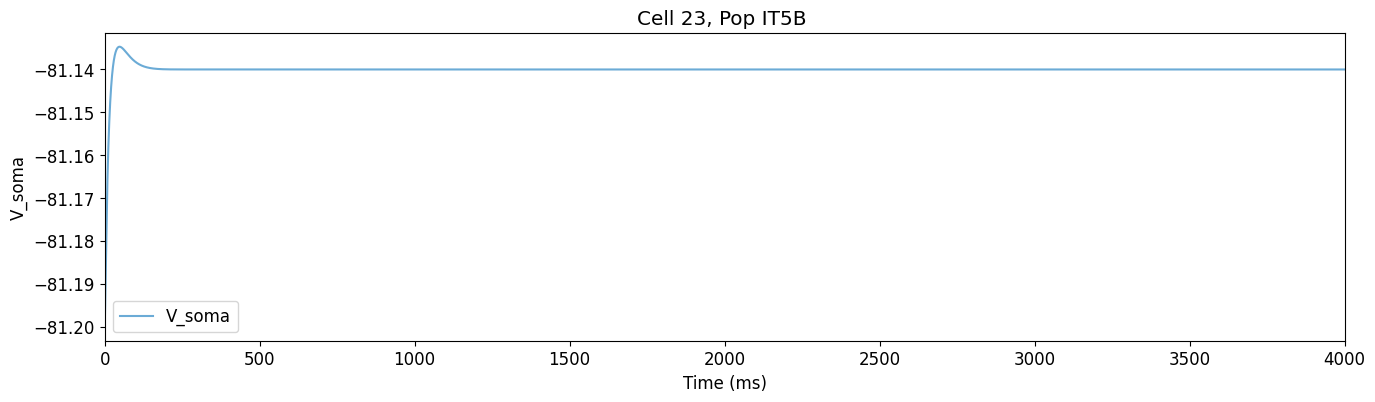

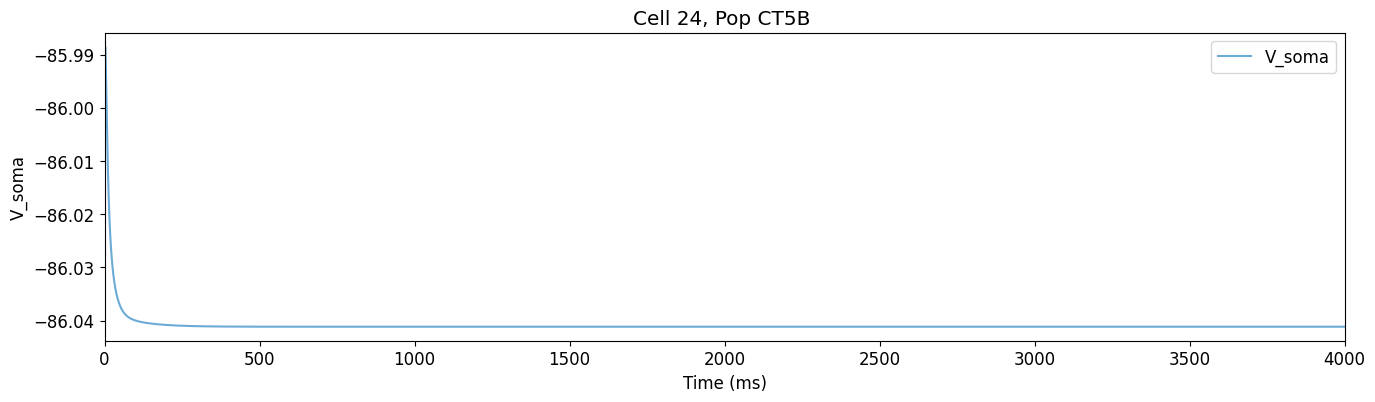

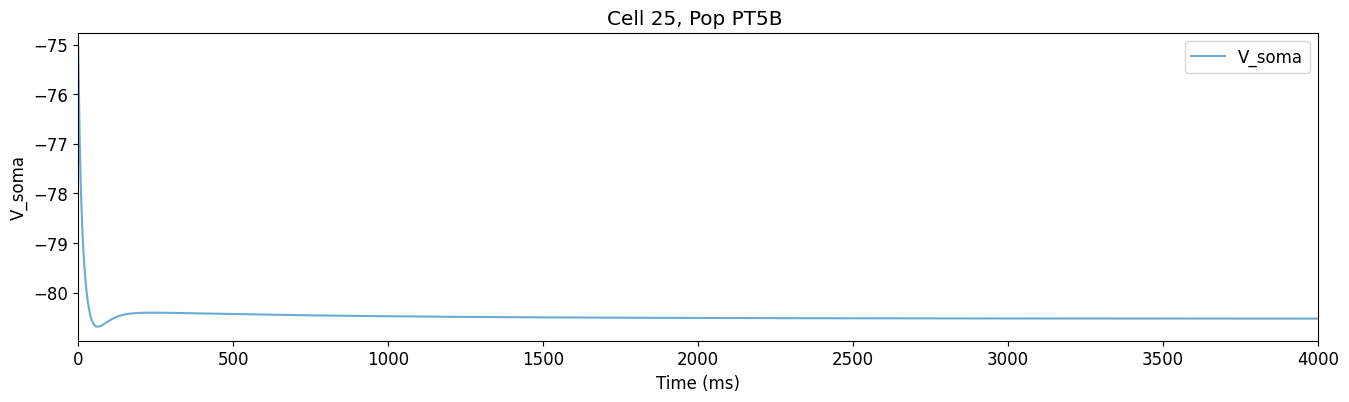

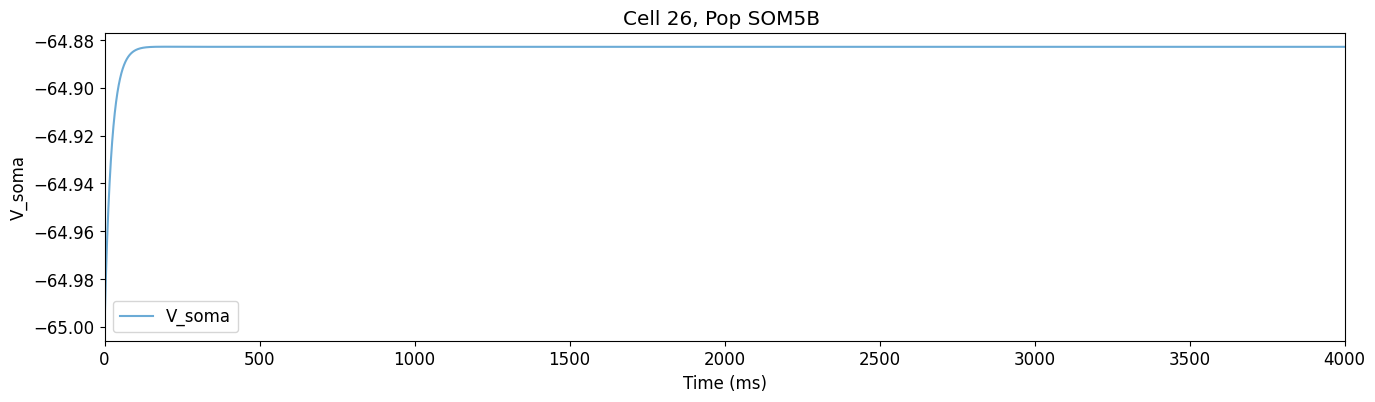

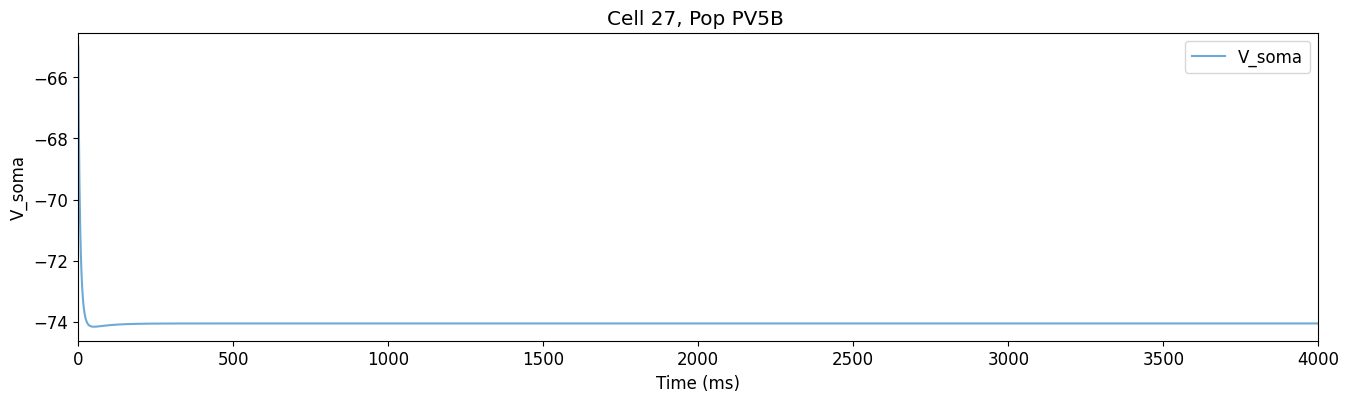

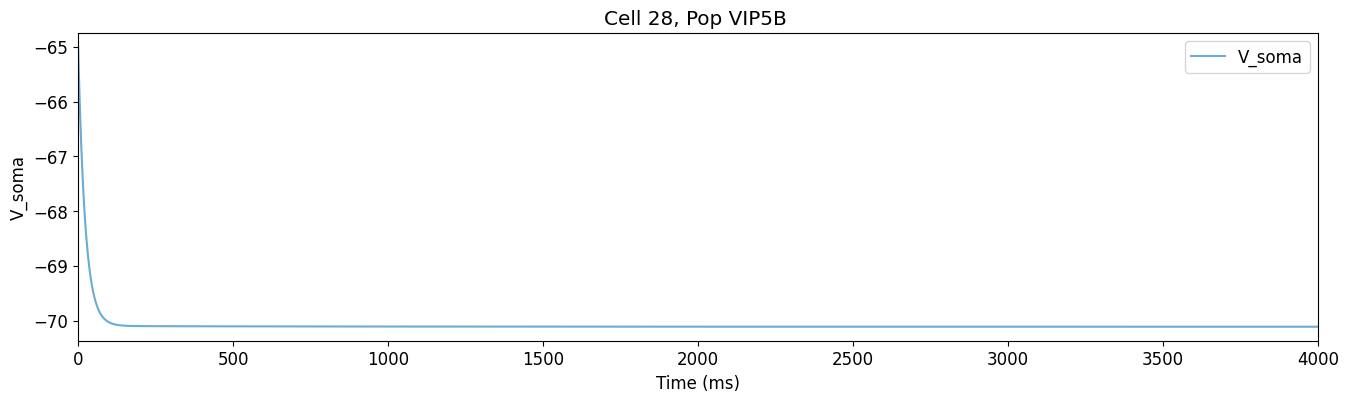

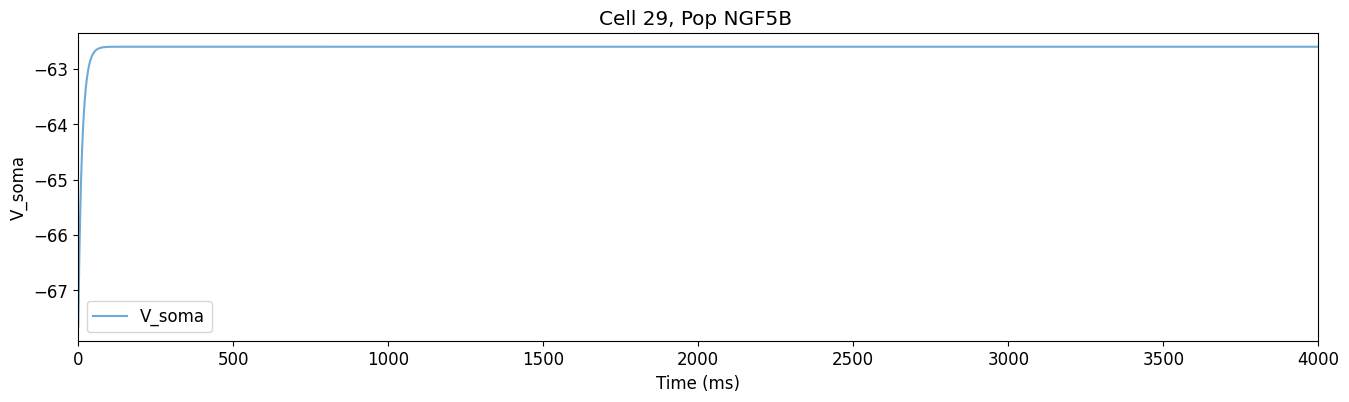

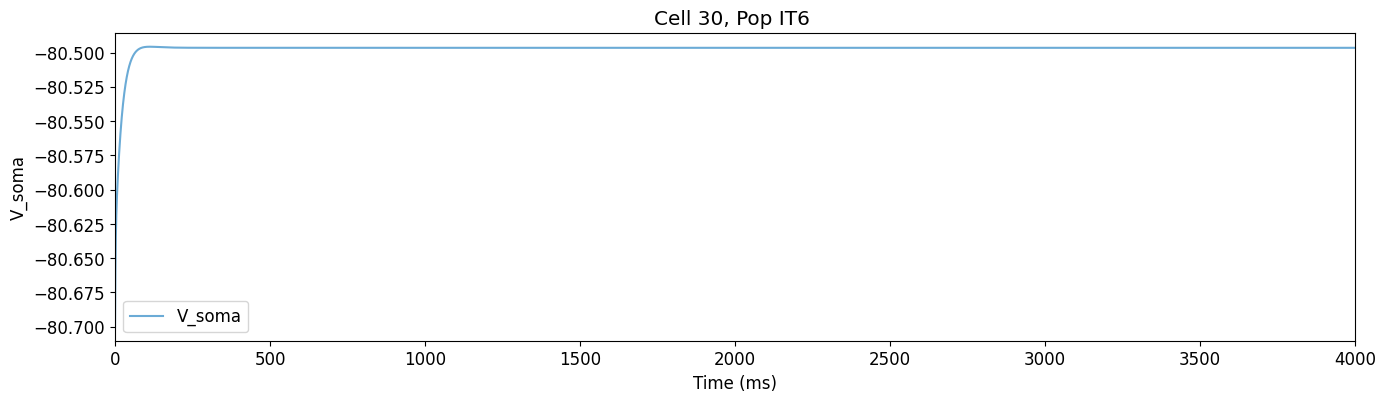

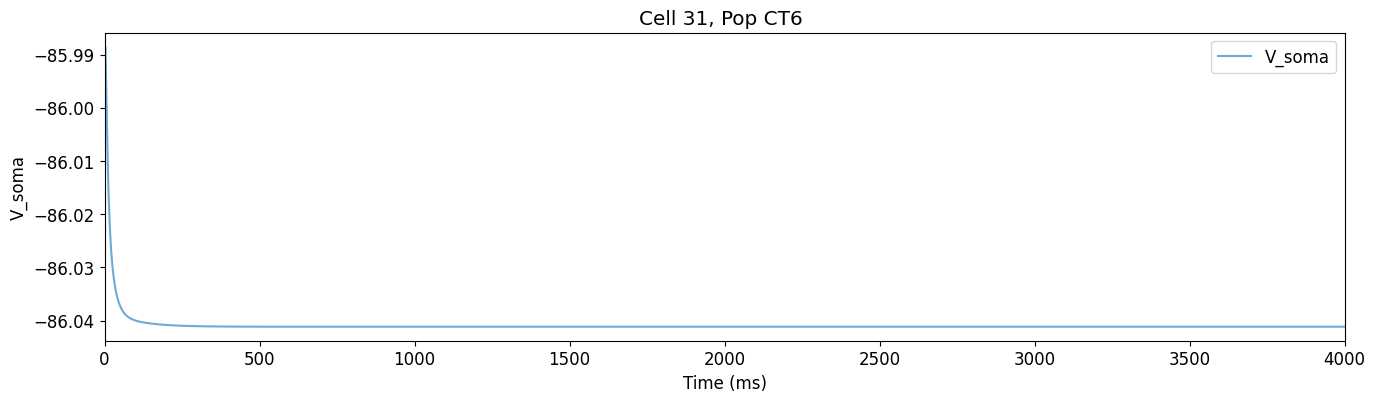

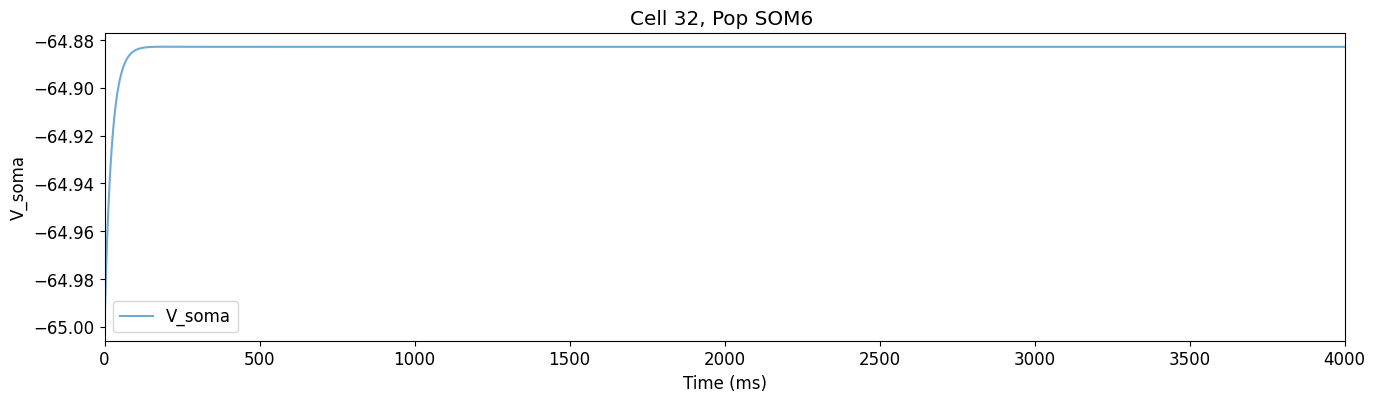

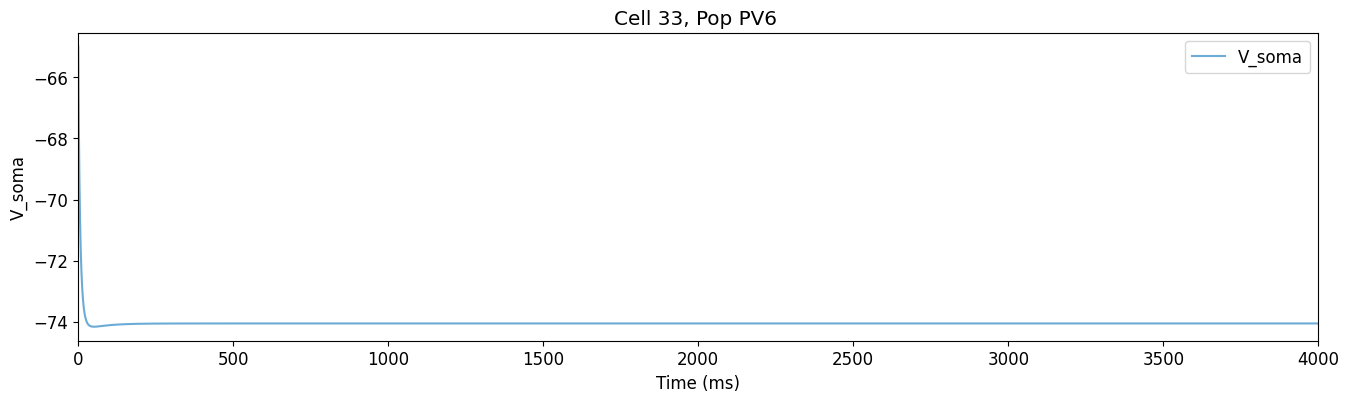

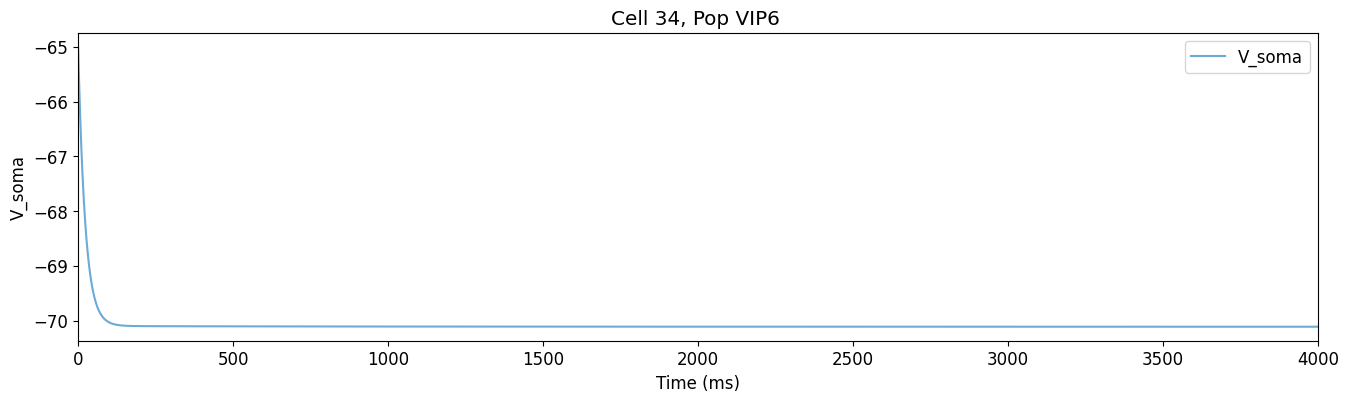

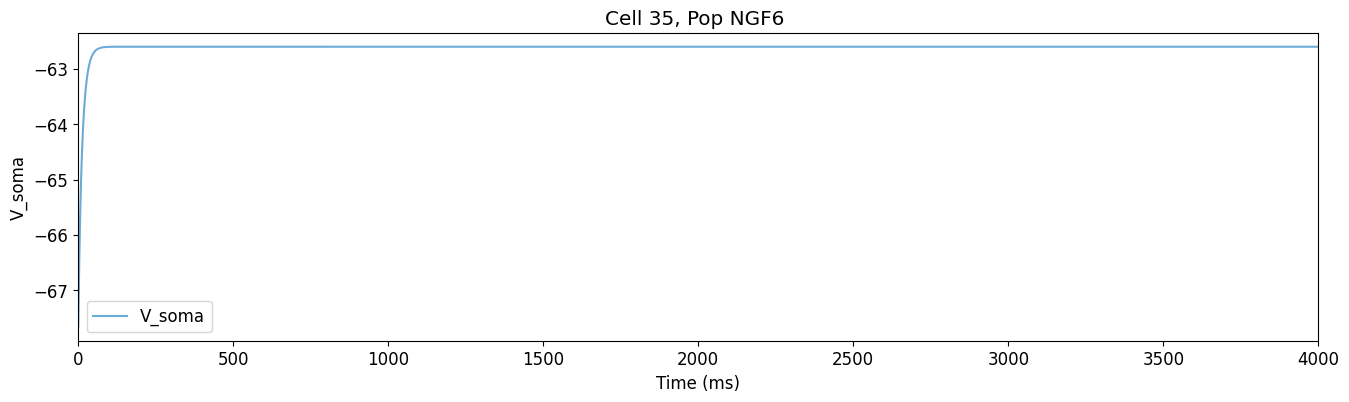

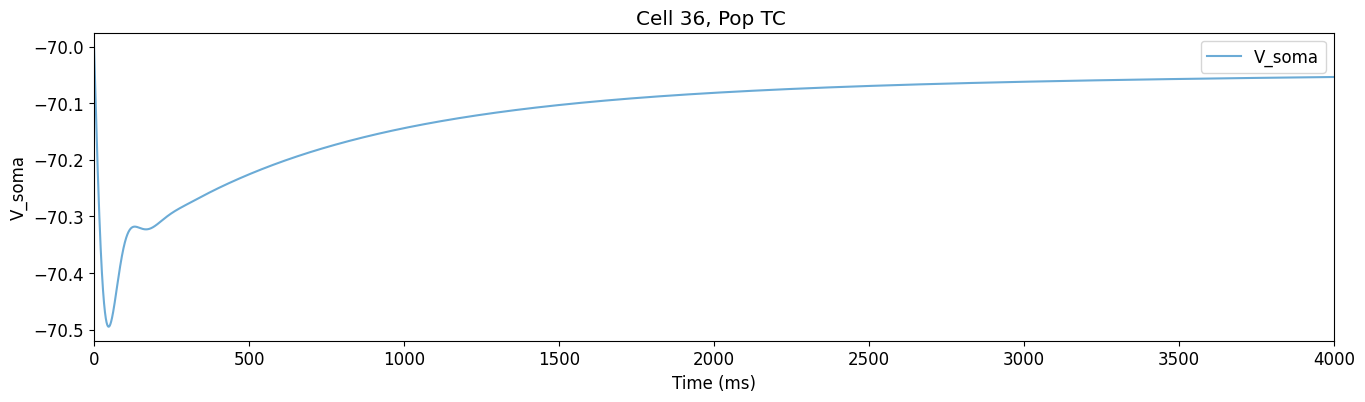

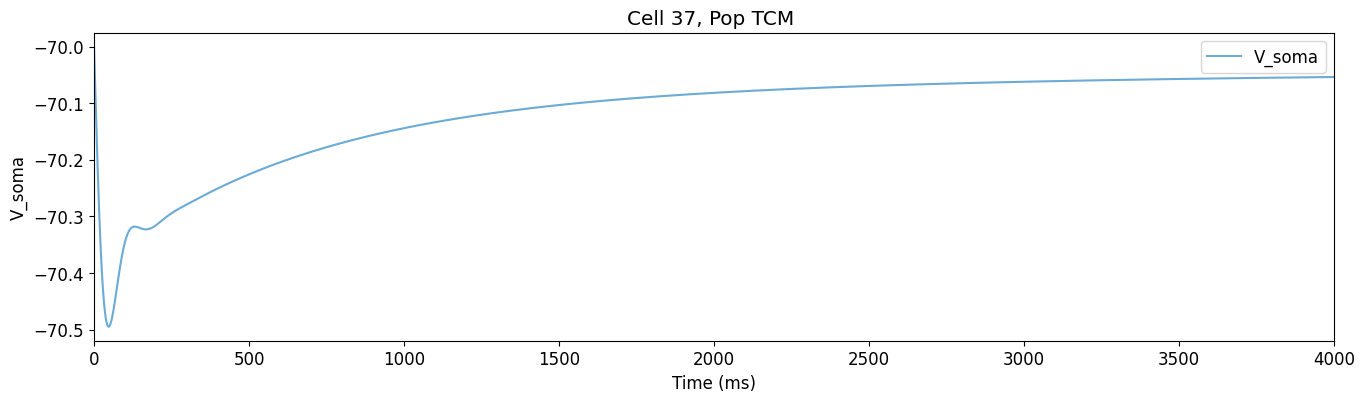

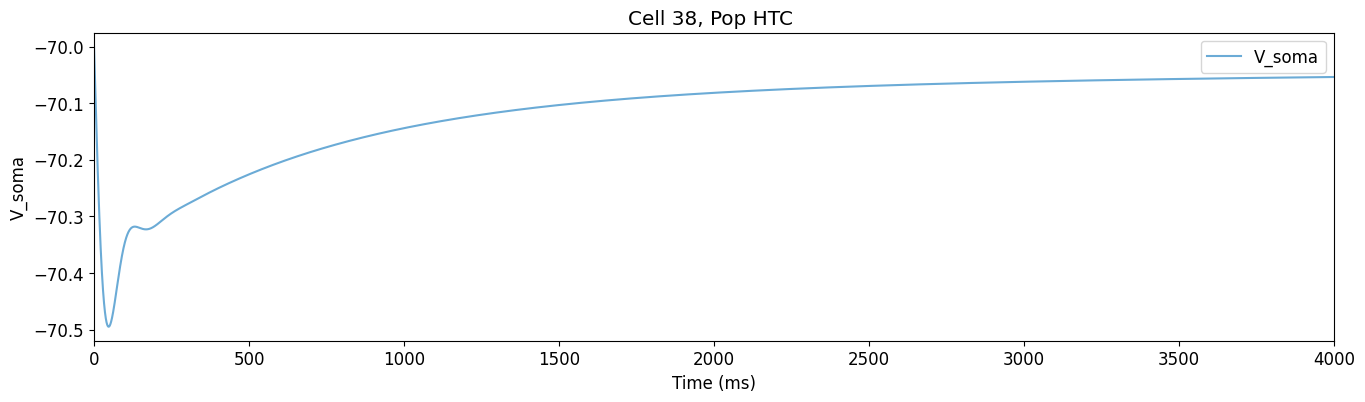

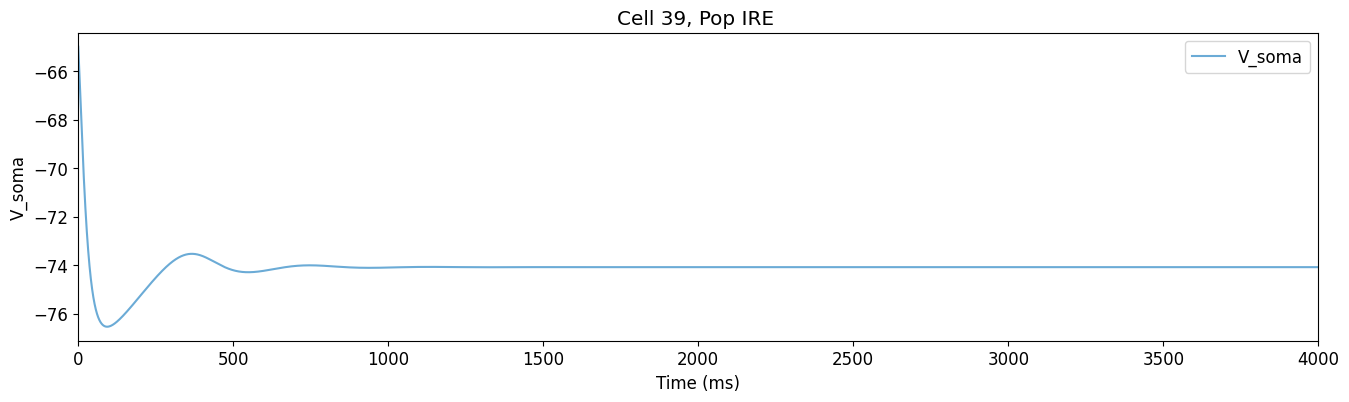

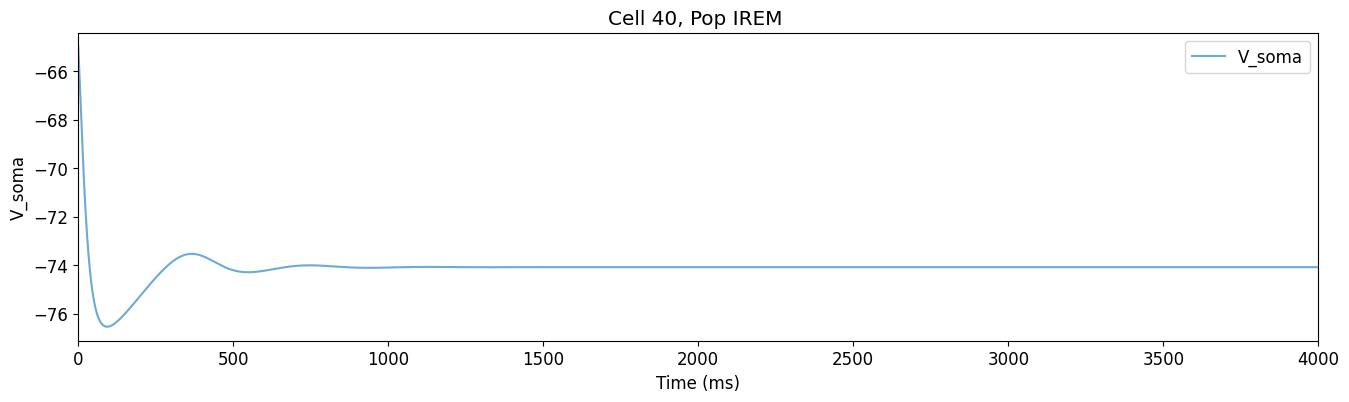

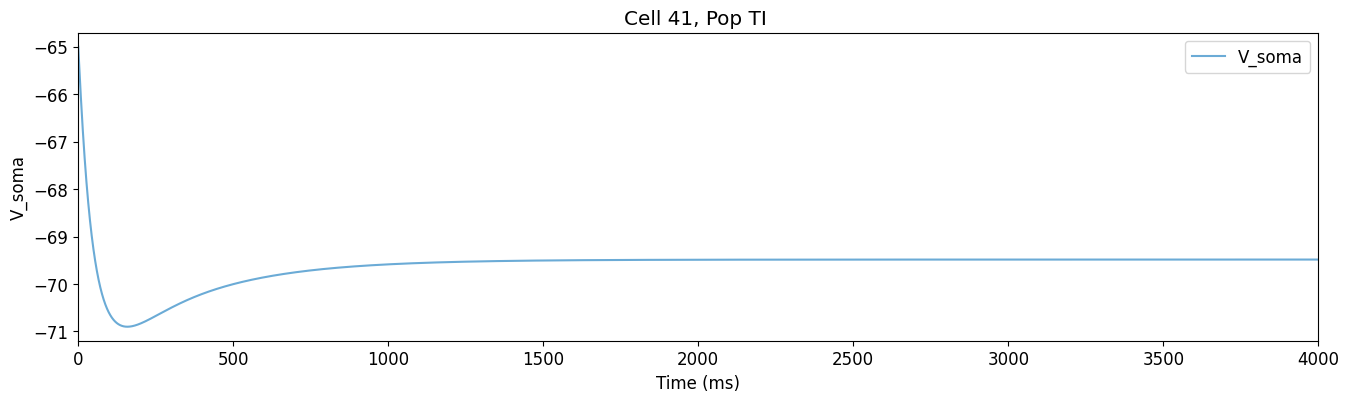

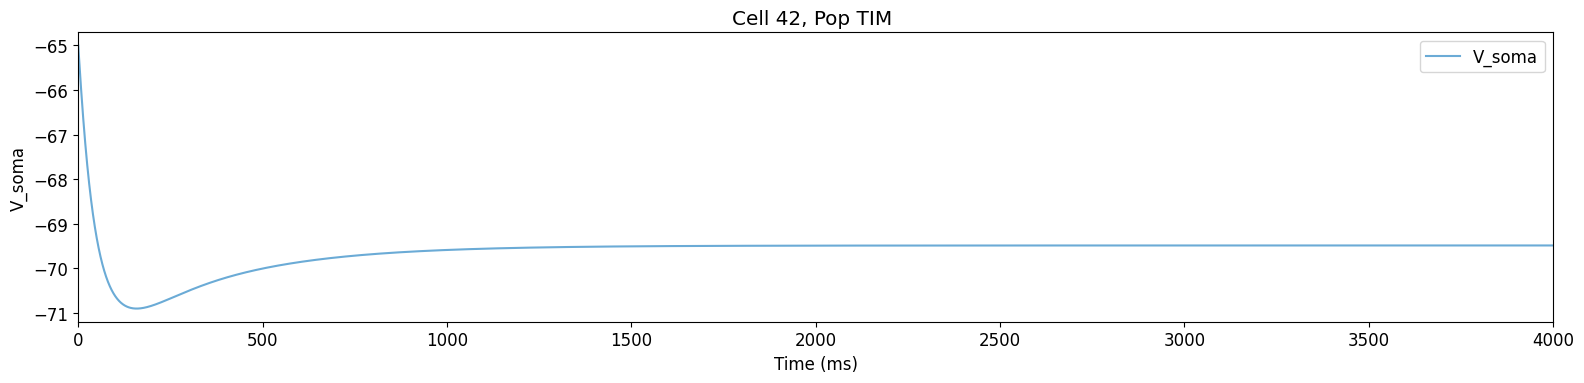

  Done; plotting time = 16.31 s


In [19]:
sim.gatherData()                  			# gather spiking data and cell info from each node
sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#
sim.analysis.plotData()         			# plot spike raster etc

In [29]:
data = sim.allSimData
pop_traces = {}
for cell in sim.net.cells:
    for idx, trace in enumerate(data['V_soma']):
        if 'cell_' + str(cell.gid) == trace:
            print(cell.tags['pop'])
            print(cell.gid)
            print(trace)
            pop_traces[cell.tags['pop']] = data['V_soma'][trace]

NGF1
0
cell_0
IT2
1
cell_1
SOM2
2
cell_2
PV2
3
cell_3
VIP2
4
cell_4
NGF2
5
cell_5
IT3
6
cell_6
SOM3
7
cell_7
PV3
8
cell_8
VIP3
9
cell_9
NGF3
10
cell_10
ITP4
11
cell_11
ITS4
12
cell_12
SOM4
13
cell_13
PV4
14
cell_14
VIP4
15
cell_15
NGF4
16
cell_16
IT5A
17
cell_17
CT5A
18
cell_18
SOM5A
19
cell_19
PV5A
20
cell_20
VIP5A
21
cell_21
NGF5A
22
cell_22
IT5B
23
cell_23
CT5B
24
cell_24
PT5B
25
cell_25
SOM5B
26
cell_26
PV5B
27
cell_27
VIP5B
28
cell_28
NGF5B
29
cell_29
IT6
30
cell_30
CT6
31
cell_31
SOM6
32
cell_32
PV6
33
cell_33
VIP6
34
cell_34
NGF6
35
cell_35
TC
36
cell_36
TCM
37
cell_37
HTC
38
cell_38
IRE
39
cell_39
IREM
40
cell_40
TI
41
cell_41
TIM
42
cell_42


In [30]:
pop_rmps = {}
for pop in pop_traces:
    rmp = np.mean(pop_traces[pop])
    pop_rmps[pop] = rmp

In [31]:
with open('data/rmp_pops_no_input.json', 'w') as f:
    json.dump(pop_rmps, f, indent=2)

In [ ]:
cells = sim.net.cells

In [ ]:
print([cell.tags['pop'] for cell in sim.net.cells])

In [ ]:
print('All cell GIDs:', [cell.gid for cell in sim.net.cells])
print('GIDs with V_soma:', list(sim.allSimData['V_soma'].keys()))

In [23]:
pop_rmps = {}

In [24]:
pop_traces={}